# **1. Introduction & Background**

- **Problem Statement:** Predict whether a ride booking will be completed or cancelled (and why), so the platform can proactively manage cancellations and improve reliability.
- **Dataset:** Aggregated Uber rides from NCR region in India with booking IDs, timestamps, locations, ride characteristics (distance, fare), operational metrics (arrival time, wait time), vehicle types, ratings, and cancellation reasons.
- **Objective:** Build predictive models to classify booking status and identify operational factors that drive cancellations.
- **Value Proposition:** Better cancellation prediction can support driver incentives, surge pricing, and customer communication to reduce failed rides and improve revenue.


# **2. Data Loading & Initial Preprocessing**

Before performing any analysis, we load the dataset and apply essential preprocessing steps to ensure it is clean, structured, and ready for exploration. This section focuses on:

### **Loading the Data**

* Importing the dataset from Drive
* Verifying successful load
* Displaying initial rows to understand layout

### **Initial Inspection**

* Checking the dataset's **shape**, **columns**, and **data types**
* Identifying categorical, numerical, and target variables
* Looking for duplicated rows or impossible values

### **Basic Preprocessing**

* Renaming inconsistent column names
* Handling obvious missing values
* Converting data types (e.g., timestamps, numerical columns)
* Dropping irrelevant columns or metadata fields

These steps ensure the dataset is clean and structured before moving into Exploratory Data Analysis (EDA).



In [ ]:
# mounting on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ncr_ride_bookings.csv')

### 2.1 Basic Information

In [ ]:
# Display first few rows
print("\n First 5 rows of the dataset:")
df.head()


 First 5 rows of the dataset:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
print("\n Dataset Information:")
df.info()


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cance

### 2.2 Statistical Summary

In [ ]:
print("\n Statistical Summary:")
df.describe()


 Statistical Summary:


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


### 2.3 Checking all column names

In [ ]:
print("\n Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


 Column Names:
 1. Date
 2. Time
 3. Booking ID
 4. Booking Status
 5. Customer ID
 6. Vehicle Type
 7. Pickup Location
 8. Drop Location
 9. Avg VTAT
10. Avg CTAT
11. Cancelled Rides by Customer
12. Reason for cancelling by Customer
13. Cancelled Rides by Driver
14. Driver Cancellation Reason
15. Incomplete Rides
16. Incomplete Rides Reason
17. Booking Value
18. Ride Distance
19. Driver Ratings
20. Customer Rating
21. Payment Method


### 2.4 Data Cleaning

In [ ]:
# Remove quotes from Booking ID and Customer ID
print(" Cleaning ID columns")
df['Booking ID'] = df['Booking ID'].str.replace('"', '', regex=False)
df['Customer ID'] = df['Customer ID'].str.replace('"', '', regex=False)

print(" Quote characters removed from IDs")
print(f"   Sample Booking ID: {df['Booking ID'].iloc[0]}")
print(f"   Sample Customer ID: {df['Customer ID'].iloc[0]}")

 Cleaning ID columns
 Quote characters removed from IDs
   Sample Booking ID: CNR5884300
   Sample Customer ID: CID1982111


#### 2.4.1 Check and Remove Duplicate Booking IDs

In [ ]:
# Check for duplicates
print(" Checking for duplicate Booking IDs")
duplicates = df['Booking ID'].duplicated().sum()
print(f"   Duplicate Booking IDs found: {duplicates}")

if duplicates > 0:
    print("\n  Displaying duplicate records:")
    duplicate_bookings = df[df['Booking ID'].duplicated(keep=False)].sort_values('Booking ID')
    print(duplicate_bookings[['Booking ID', 'Date', 'Time', 'Booking Status', 'Customer ID']].head(10))

    # Remove duplicates keeping first occurrence
    df = df.drop_duplicates(subset='Booking ID', keep='first')
    print(f"\n Duplicates removed. New shape: {df.shape}")
else:
    print("No duplicate Booking IDs found!")

 Checking for duplicate Booking IDs
   Duplicate Booking IDs found: 1233

  Displaying duplicate records:
        Booking ID        Date      Time         Booking Status Customer ID
81334   CNR1026036  2024-10-15  18:17:23              Completed  CID6480133
9192    CNR1026036  2024-07-21  17:59:41        No Driver Found  CID6974869
9587    CNR1029172  2024-12-17  19:19:02              Completed  CID6382731
1353    CNR1029172  2024-01-19  17:00:57             Incomplete  CID2615731
82029   CNR1051228  2024-11-05  16:50:20              Completed  CID3177617
110412  CNR1051228  2024-01-31  08:42:04              Completed  CID5242056
87333   CNR1056023  2024-04-20  23:16:21              Completed  CID9367665
120008  CNR1056023  2024-07-07  17:18:49             Incomplete  CID4890470
71570   CNR1058956  2024-02-12  19:02:47  Cancelled by Customer  CID2451799
38548   CNR1058956  2024-10-15  13:33:55              Completed  CID1882606

 Duplicates removed. New shape: (148767, 21)


#### 2.4.2 Rename Columns for Clarity

In [ ]:
# Rename columns
print("Renaming columns for better clarity")

column_rename_map = {
    'Avg VTAT': 'Avg_Vehicle_Arrival_Time',
    'Avg CTAT': 'Avg_Customer_Wait_Time',
    'Booking Value': 'Fare_Amount',
    'Ride Distance': 'Distance_KM',
    'Driver Ratings': 'Driver_Rating',
    'Cancelled Rides by Customer': 'Customer_Cancelled',
    'Cancelled Rides by Driver': 'Driver_Cancelled',
    'Incomplete Rides': 'Incomplete_Ride',
    'Reason for cancelling by Customer': 'Customer_Cancellation_Reason',
    'Driver Cancellation Reason': 'Driver_Cancellation_Reason',
    'Incomplete Rides Reason': 'Incomplete_Ride_Reason'
}

df.rename(columns=column_rename_map, inplace=True)

print(" Columns renamed successfully!")
print("\n New column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Renaming columns for better clarity
 Columns renamed successfully!

 New column names:
 1. Date
 2. Time
 3. Booking ID
 4. Booking Status
 5. Customer ID
 6. Vehicle Type
 7. Pickup Location
 8. Drop Location
 9. Avg_Vehicle_Arrival_Time
10. Avg_Customer_Wait_Time
11. Customer_Cancelled
12. Customer_Cancellation_Reason
13. Driver_Cancelled
14. Driver_Cancellation_Reason
15. Incomplete_Ride
16. Incomplete_Ride_Reason
17. Fare_Amount
18. Distance_KM
19. Driver_Rating
20. Customer Rating
21. Payment Method


#### 2.4.3 Standardize Vehicle Type Names

In [ ]:
# Rename 'Auto' to 'Three_Wheeler' for clarity
print("Standardizing vehicle types")
print(f"\nOriginal Vehicle Types:\n{df['Vehicle Type'].value_counts()}")

df['Vehicle Type'] = df['Vehicle Type'].replace('Auto', 'Three_Wheeler')

print(f"\n Updated Vehicle Types:\n{df['Vehicle Type'].value_counts()}")

Standardizing vehicle types

Original Vehicle Types:
Vehicle Type
Auto             37129
Go Mini          29556
Go Sedan         26934
Bike             22318
Premier Sedan    17950
eBike            10458
Uber XL           4422
Name: count, dtype: int64

 Updated Vehicle Types:
Vehicle Type
Three_Wheeler    37129
Go Mini          29556
Go Sedan         26934
Bike             22318
Premier Sedan    17950
eBike            10458
Uber XL           4422
Name: count, dtype: int64


#### 2.4.4 Standardize Date Format

In [ ]:
# Convert Date and Time to datetime
print("Standardizing date and time formats")

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Create a combined datetime column
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

# Extract useful time features
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month_name()
df['Day'] = df['DateTime'].dt.day
df['IsWeekend'] = df['DateTime'].dt.dayofweek.isin([5, 6]).astype(int)

# Create time period categories
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Period'] = df['Hour'].apply(categorize_time)

print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"\nTime-based features added:")
print(f"   - Hour, DayOfWeek, Month, Day")
print(f"   - IsWeekend, Time_Period")

Standardizing date and time formats
Date range: 2024-01-01 00:00:00 to 2024-12-30 00:00:00

Time-based features added:
   - Hour, DayOfWeek, Month, Day
   - IsWeekend, Time_Period


### 2.5 Missing Value Analysis

 Missing Value Analysis
                      Column  Missing_Count  Missing_Percentage
             Incomplete_Ride         139840               94.00
      Incomplete_Ride_Reason         139840               94.00
Customer_Cancellation_Reason         138365               93.01
          Customer_Cancelled         138365               93.01
            Driver_Cancelled         121978               81.99
  Driver_Cancellation_Reason         121978               81.99
               Driver_Rating          56519               37.99
             Customer Rating          56519               37.99
                 Fare_Amount          47592               31.99
                 Distance_KM          47592               31.99
      Avg_Customer_Wait_Time          47592               31.99
              Payment Method          47592               31.99
    Avg_Vehicle_Arrival_Time          10401                6.99


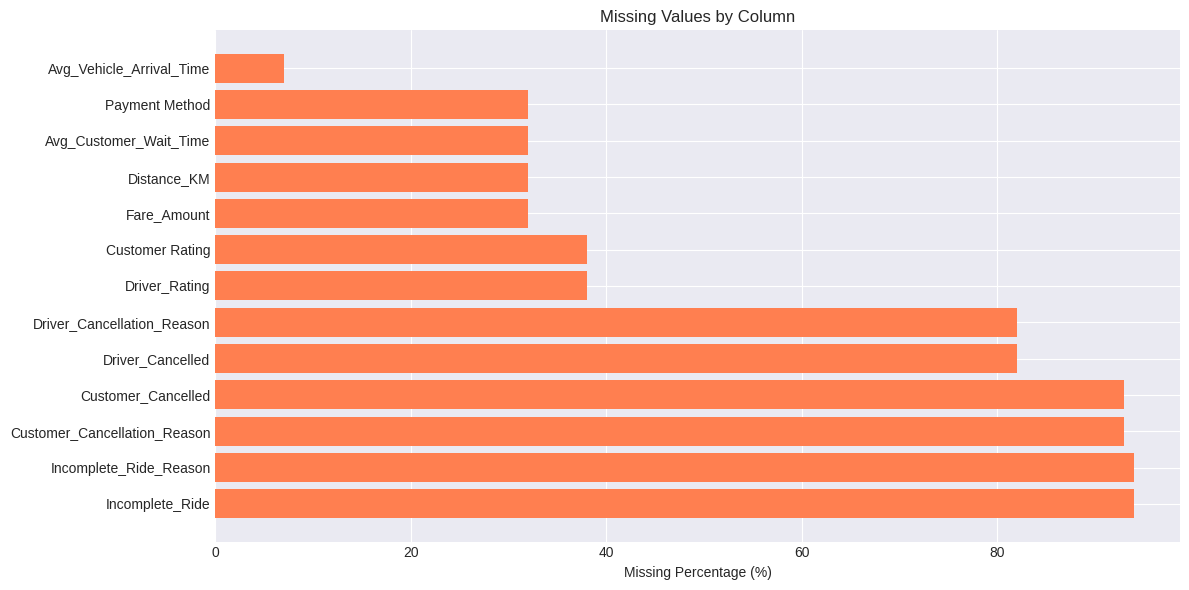

In [ ]:
# Comprehensive missing value analysis
print(" Missing Value Analysis\n" + "="*50)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))

    # Visualize missing values
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found!")

#### 2.5.1 Handle Missing Values Based on Booking Status

In [ ]:
# Analyze missing values by booking status
print("\n Missing Values by Booking Status:\n")

for status in df['Booking Status'].unique():
    subset = df[df['Booking Status'] == status]
    print(f"\n{status}:")
    print(f"  Count: {len(subset)}")
    print(f"  Missing Fare: {subset['Fare_Amount'].isnull().sum()}")
    print(f"  Missing Distance: {subset['Distance_KM'].isnull().sum()}")
    print(f"  Missing Ratings: {subset['Driver_Rating'].isnull().sum()}")


 Missing Values by Booking Status:


No Driver Found:
  Count: 10401
  Missing Fare: 10401
  Missing Distance: 10401
  Missing Ratings: 10401

Incomplete:
  Count: 8927
  Missing Fare: 0
  Missing Distance: 0
  Missing Ratings: 8927

Completed:
  Count: 92248
  Missing Fare: 0
  Missing Distance: 0
  Missing Ratings: 0

Cancelled by Driver:
  Count: 26789
  Missing Fare: 26789
  Missing Distance: 26789
  Missing Ratings: 26789

Cancelled by Customer:
  Count: 10402
  Missing Fare: 10402
  Missing Distance: 10402
  Missing Ratings: 10402


#### 2.5.2 Handle Missing Values

In [ ]:
# Handle missing values
print("\n Handling Missing Values\n")

# 1. For 'No Driver Found' and cancelled rides, it's expected to have NaN values
# Filling Fare_Amount with 0 for these cases
conditions_no_fare = ['No Driver Found', 'Cancelled by Customer', 'Cancelled by Driver']
df.loc[df['Booking Status'].isin(conditions_no_fare), 'Fare_Amount'] = df.loc[
    df['Booking Status'].isin(conditions_no_fare), 'Fare_Amount'
].fillna(0)

# 2. Creating flags for cancelled/incomplete rides
df['Customer_Cancelled'] = df['Customer_Cancelled'].fillna(0)
df['Driver_Cancelled'] = df['Driver_Cancelled'].fillna(0)
df['Incomplete_Ride'] = df['Incomplete_Ride'].fillna(0)

# 3. For Payment Method - mark as 'None' for unsuccessful bookings
df['Payment Method'] = df['Payment Method'].fillna('None')

print(" Missing value handling complete!")
print(f"\nRemaining missing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])


 Handling Missing Values

 Missing value handling complete!

Remaining missing values:
Avg_Vehicle_Arrival_Time         10401
Avg_Customer_Wait_Time           47592
Customer_Cancellation_Reason    138365
Driver_Cancellation_Reason      121978
Incomplete_Ride_Reason          139840
Distance_KM                      47592
Driver_Rating                    56519
Customer Rating                  56519
dtype: int64


### 2.6 Outlier Detection and Analysis

In [ ]:
# Identify outliers in numerical columns
print("Outlier Detection\n" + "="*80)

numerical_cols = ['Fare_Amount', 'Distance_KM', 'Avg_Vehicle_Arrival_Time',
                  'Avg_Customer_Wait_Time', 'Driver_Rating', 'Customer Rating']

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    data = df[column].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []

for col in numerical_cols:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_summary.append({
            'Column': col,
            'Outliers_Count': len(outliers),
            'Outliers_Percentage': f"{(len(outliers)/df[col].notna().sum()*100):.2f}%",
            'Lower_Bound': f"{lower:.2f}",
            'Upper_Bound': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

Outlier Detection
                  Column  Outliers_Count Outliers_Percentage Lower_Bound Upper_Bound
             Fare_Amount            4091               2.75%     -781.50     1302.50
             Distance_KM               0               0.00%      -24.08       73.36
Avg_Vehicle_Arrival_Time               0               0.00%       -3.70       20.30
  Avg_Customer_Wait_Time               0               0.00%       -1.20       59.60
           Driver_Rating            5162               5.60%        3.35        5.35
         Customer Rating            3237               3.51%        3.30        5.70


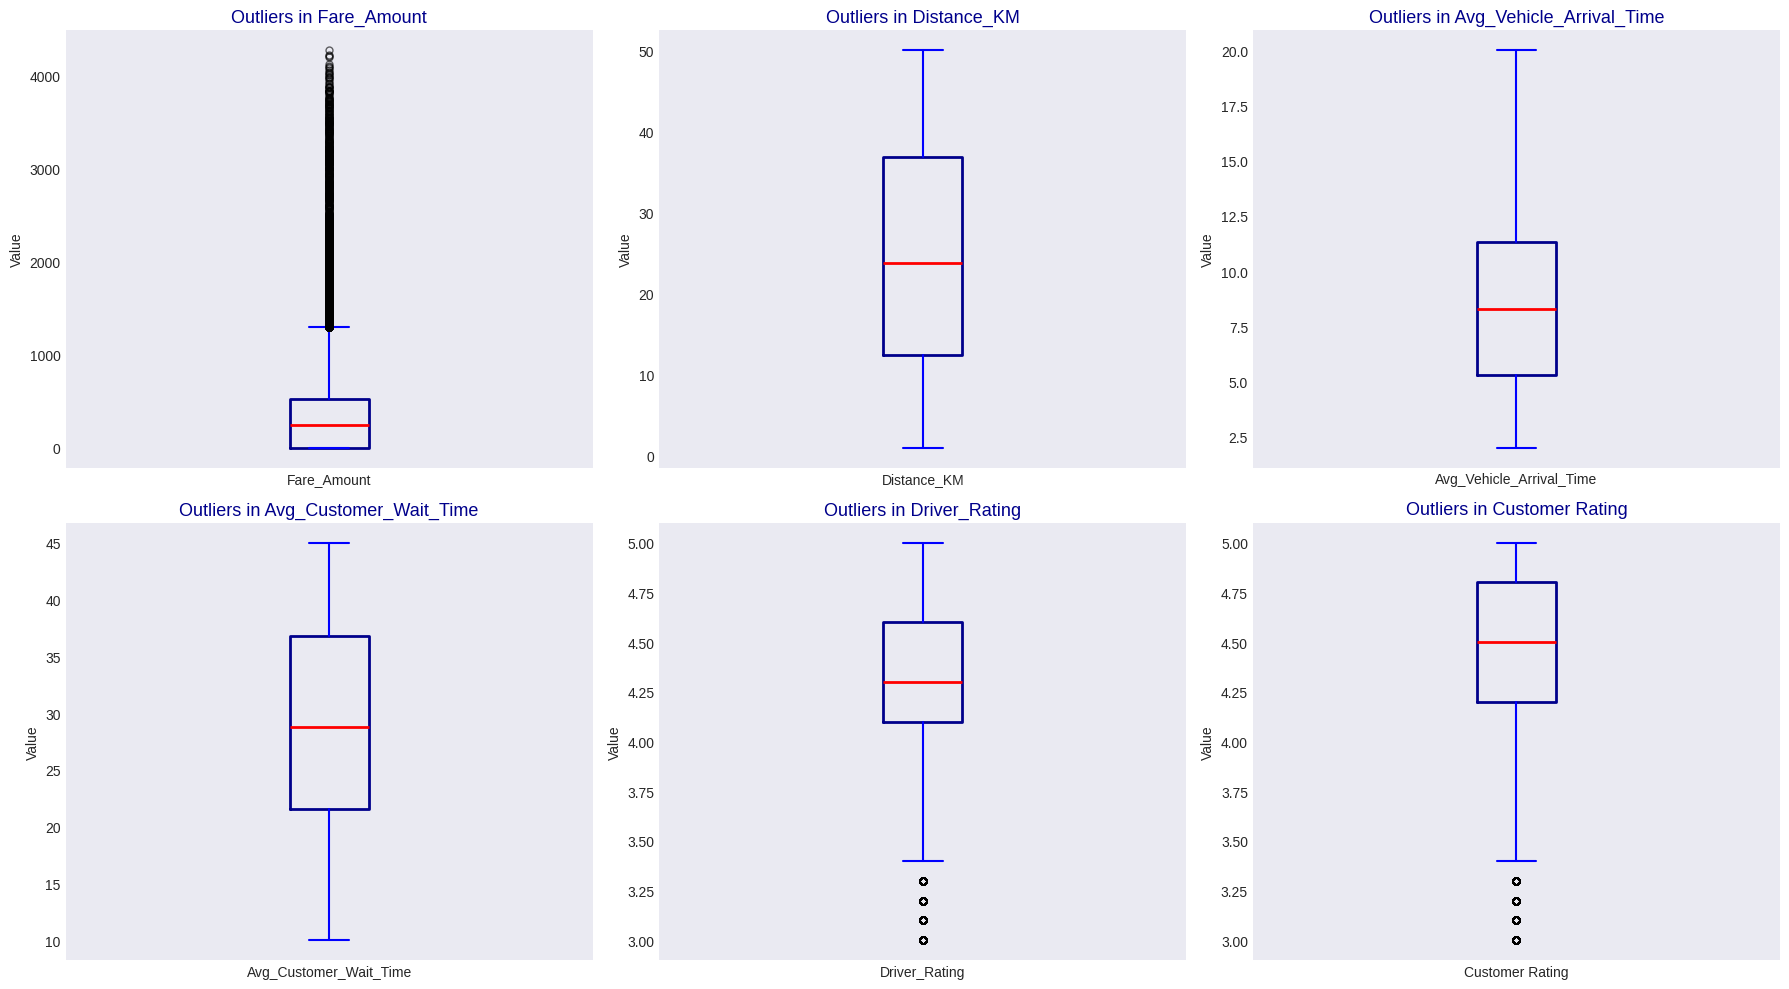

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if col in df.columns:
        df.boxplot(
            column=col,
            ax=axes[idx],
            grid=False,
            boxprops=dict(color='darkblue', linewidth=2),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=1.5),
            capprops=dict(color='blue', linewidth=1.5),
            flierprops=dict(marker='o', color='orange', markersize=5, alpha=0.6)
        )
        axes[idx].set_title(f'Outliers in {col}', fontsize=13, color='darkblue')
        axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

#### 2.6.1 Explanation of Outlier Box Plots
These box plots visually represent the distribution of key numerical features and highlight potential outliers, which are data points that fall significantly outside the typical range.

#####   **Central Box (IQR):** The box itself spans the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3). This contains the middle 50% of the data.
#####    **Median Line:** The red line inside the box indicates the median (50th percentile) of the data.
#####    **Whiskers:** The lines extending from the box (whiskers) typically show the range of data within 1.5 times the IQR from Q1 and Q3. Data points beyond these whiskers are considered outliers.
#####    **Outliers:** Individual orange circles represent data points identified as outliers. These are values that are unusually high or low compared to the rest of the dataset.

---

### From these plots, we can observe:
#####   **Fare_Amount & Distance_KM:** These show some outliers, particularly on the higher end, indicating some unusually high fares or long-distance rides.
#####   **Avg_Vehicle_Arrival_Time & Avg_Customer_Wait_Time:** Appear to have distributions within expected ranges, with fewer prominent outliers, suggesting these operational times are relatively consistent or their outliers are not as extreme.
#####   **Driver_Rating & Customer Rating:** These plots indicate that while most ratings cluster around the higher end (4-5 stars), there are a number of outliers representing lower ratings (3.0-3.5) that are less common but present.

#### 2.6.2 Handle Outliers

In [ ]:
# Creating flags for potential outliers

print("Creating outlier flags\n")

# Flagging extreme fares (>99th percentile)
if 'Fare_Amount' in df.columns:
    fare_99 = df['Fare_Amount'].quantile(0.99)
    df['High_Fare_Flag'] = (df['Fare_Amount'] > fare_99).astype(int)
    print(f"High fare threshold (99th percentile): ₹{fare_99:.2f}")
    print(f"Records flagged: {df['High_Fare_Flag'].sum()}")

# Flagging extreme distances
if 'Distance_KM' in df.columns:
    dist_99 = df['Distance_KM'].quantile(0.99)
    df['Long_Distance_Flag'] = (df['Distance_KM'] > dist_99).astype(int)
    print(f"\nLong distance threshold (99th percentile): {dist_99:.2f} km")
    print(f"Records flagged: {df['Long_Distance_Flag'].sum()}")

print("\n Outlier flags created (data preserved for analysis)")

Creating outlier flags

High fare threshold (99th percentile): ₹1677.00
Records flagged: 1486

Long distance threshold (99th percentile): 49.47 km
Records flagged: 1001

 Outlier flags created (data preserved for analysis)


# **3. Exploratory Data Analysis: Distributions and Relationships**

In this section, we do the Exploratory Data Analysis by focusing on:

- Distributions of key numerical variables
- Frequency of important categorical variables
- Relationships between predictors and booking status
- Correlations between numerical features

The goal is to build business intuition about cancellations and successful rides, and to connect these patterns to later modeling choices.


### 3.1 Univariate Analysis

Booking Status Distribution
                       Count  Percentage
Booking Status                          
Completed              92248       62.01
Cancelled by Driver    26789       18.01
Cancelled by Customer  10402        6.99
No Driver Found        10401        6.99
Incomplete              8927        6.00


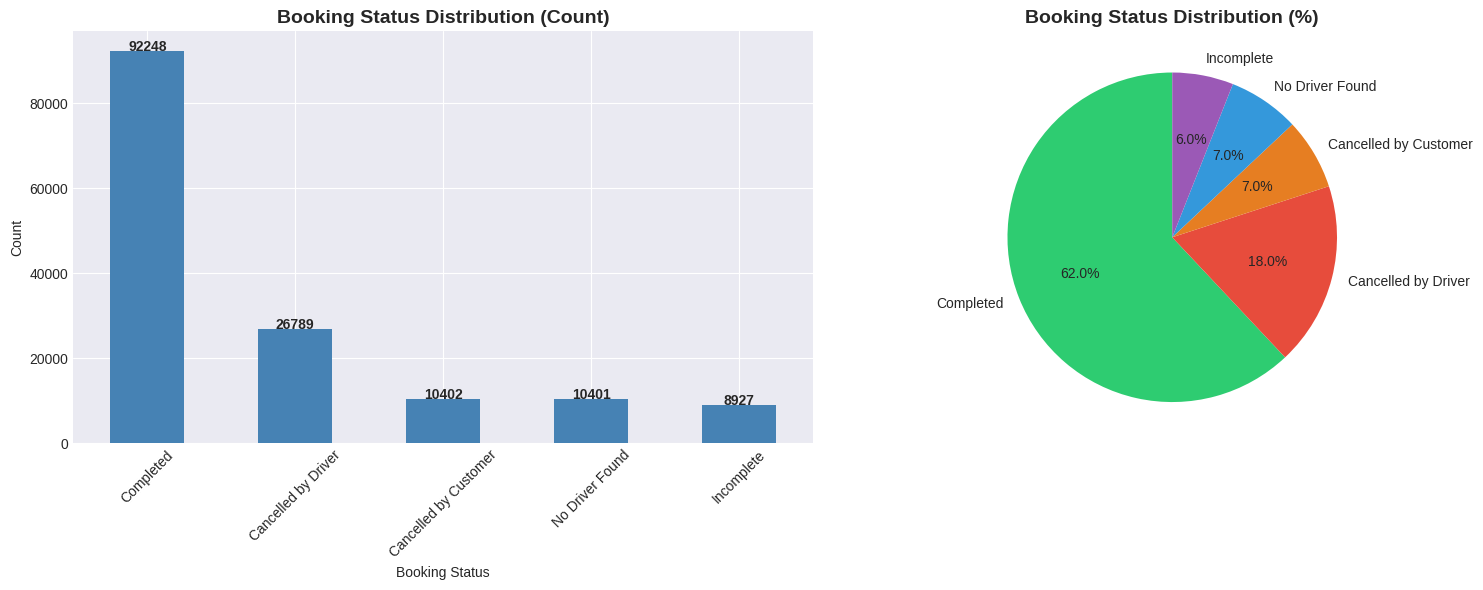


 KEY INSIGHT: 62.0% completion rate


In [ ]:
# Booking Status Analysis
print("Booking Status Distribution\n" + "="*50)

booking_status_counts = df['Booking Status'].value_counts()
booking_status_pct = df['Booking Status'].value_counts(normalize=True) * 100

status_df = pd.DataFrame({
    'Count': booking_status_counts,
    'Percentage': booking_status_pct.round(2)
})

print(status_df)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
booking_status_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Booking Status Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Booking Status')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for i, v in enumerate(booking_status_counts):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c', '#e67e22', '#3498db', '#9b59b6']
ax2.pie(booking_status_counts, labels=booking_status_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors[:len(booking_status_counts)])
ax2.set_title('Booking Status Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Key Insight
completed_rate = booking_status_pct.get('Completed', 0)
print(f"\n KEY INSIGHT: {completed_rate:.1f}% completion rate")

In [ ]:
### Vehicle Type Analysis


 Vehicle Type Distribution
               Count  Percentage
Vehicle Type                    
Three_Wheeler  37129       24.96
Go Mini        29556       19.87
Go Sedan       26934       18.10
Bike           22318       15.00
Premier Sedan  17950       12.07
eBike          10458        7.03
Uber XL         4422        2.97


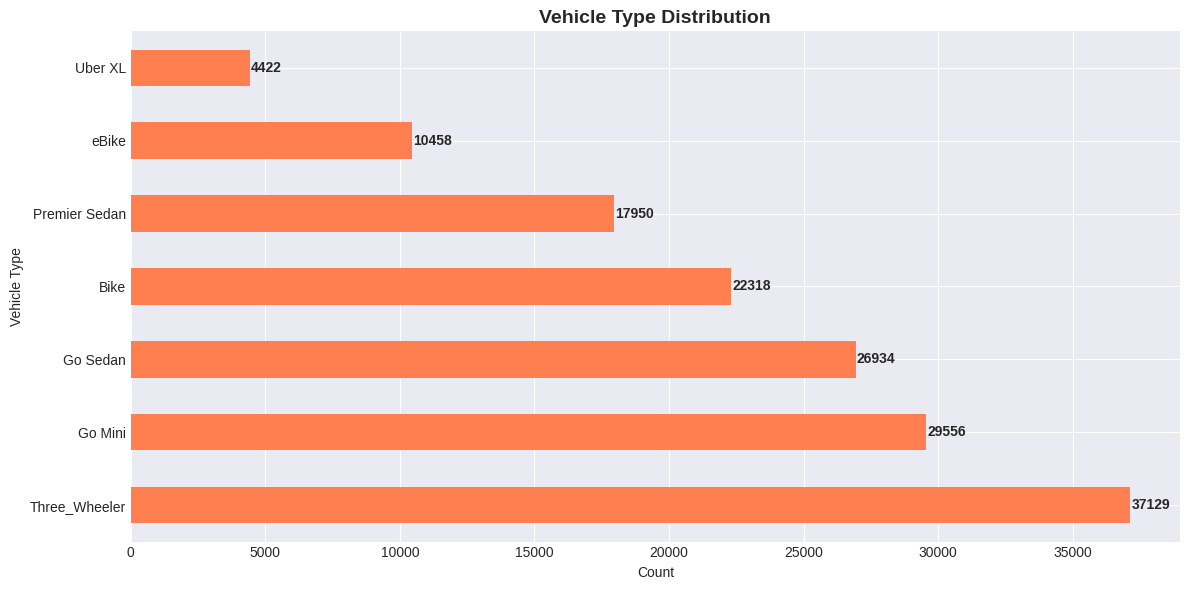

In [ ]:
# Vehicle Type Distribution
print("\n Vehicle Type Distribution\n" + "="*50)

vehicle_counts = df['Vehicle Type'].value_counts()
vehicle_pct = df['Vehicle Type'].value_counts(normalize=True) * 100

vehicle_df = pd.DataFrame({
    'Count': vehicle_counts,
    'Percentage': vehicle_pct.round(2)
})

print(vehicle_df)

# Visualize
plt.figure(figsize=(12, 6))
vehicle_counts.plot(kind='barh', color='coral')
plt.title('Vehicle Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')

for i, v in enumerate(vehicle_counts):
    plt.text(v + 50, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
### Payment Method Distribution


 Payment Method Distribution
                Count  Percentage
Payment Method                   
UPI             41500       44.99
Cash            22922       24.85
Uber Wallet     11116       12.05
Credit Card      9240       10.02
Debit Card       7470        8.10


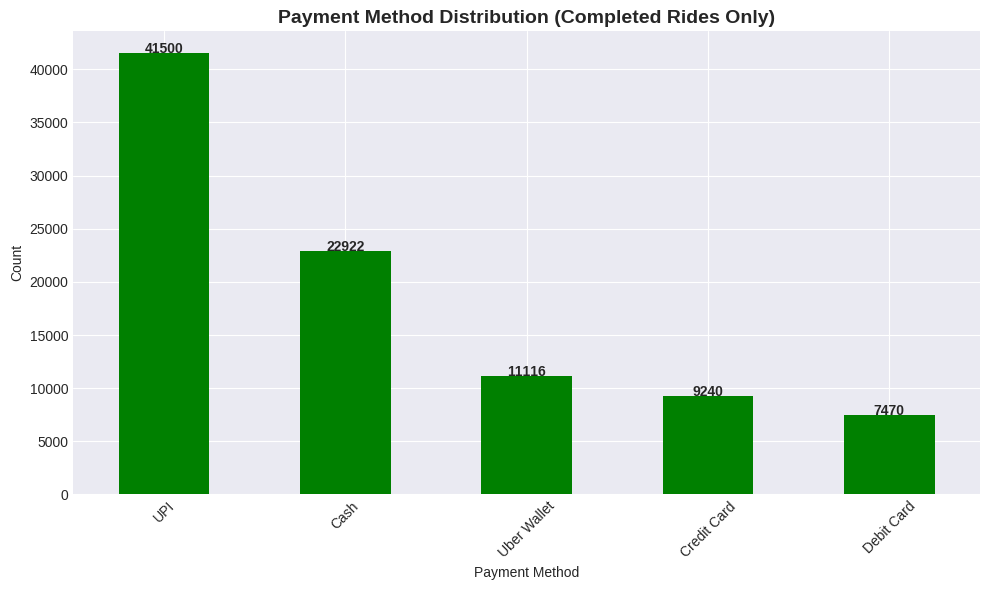

In [ ]:
# Payment Method Analysis
print("\n Payment Method Distribution\n" + "="*50)

# Only for completed rides
completed_df = df[df['Booking Status'] == 'Completed']
payment_counts = completed_df['Payment Method'].value_counts()
payment_pct = completed_df['Payment Method'].value_counts(normalize=True) * 100

payment_df = pd.DataFrame({
    'Count': payment_counts,
    'Percentage': payment_pct.round(2)
})

print(payment_df)

# Visualizing
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='green')
plt.title('Payment Method Distribution (Completed Rides Only)', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, v in enumerate(payment_counts):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
### Numerical Features Distribution


 Distribution of Key Numerical Features
        Fare_Amount   Distance_KM  Driver_Rating  Customer Rating
count  92248.000000  92248.000000   92248.000000     92248.000000
mean     508.188611     26.004724       4.230756         4.404301
std      396.264841     13.823992       0.436741         0.437908
min       50.000000      2.000000       3.000000         3.000000
25%      234.000000     14.100000       4.100000         4.200000
50%      414.000000     26.030000       4.300000         4.500000
75%      688.000000     37.950000       4.600000         4.800000
max     4277.000000     50.000000       5.000000         5.000000


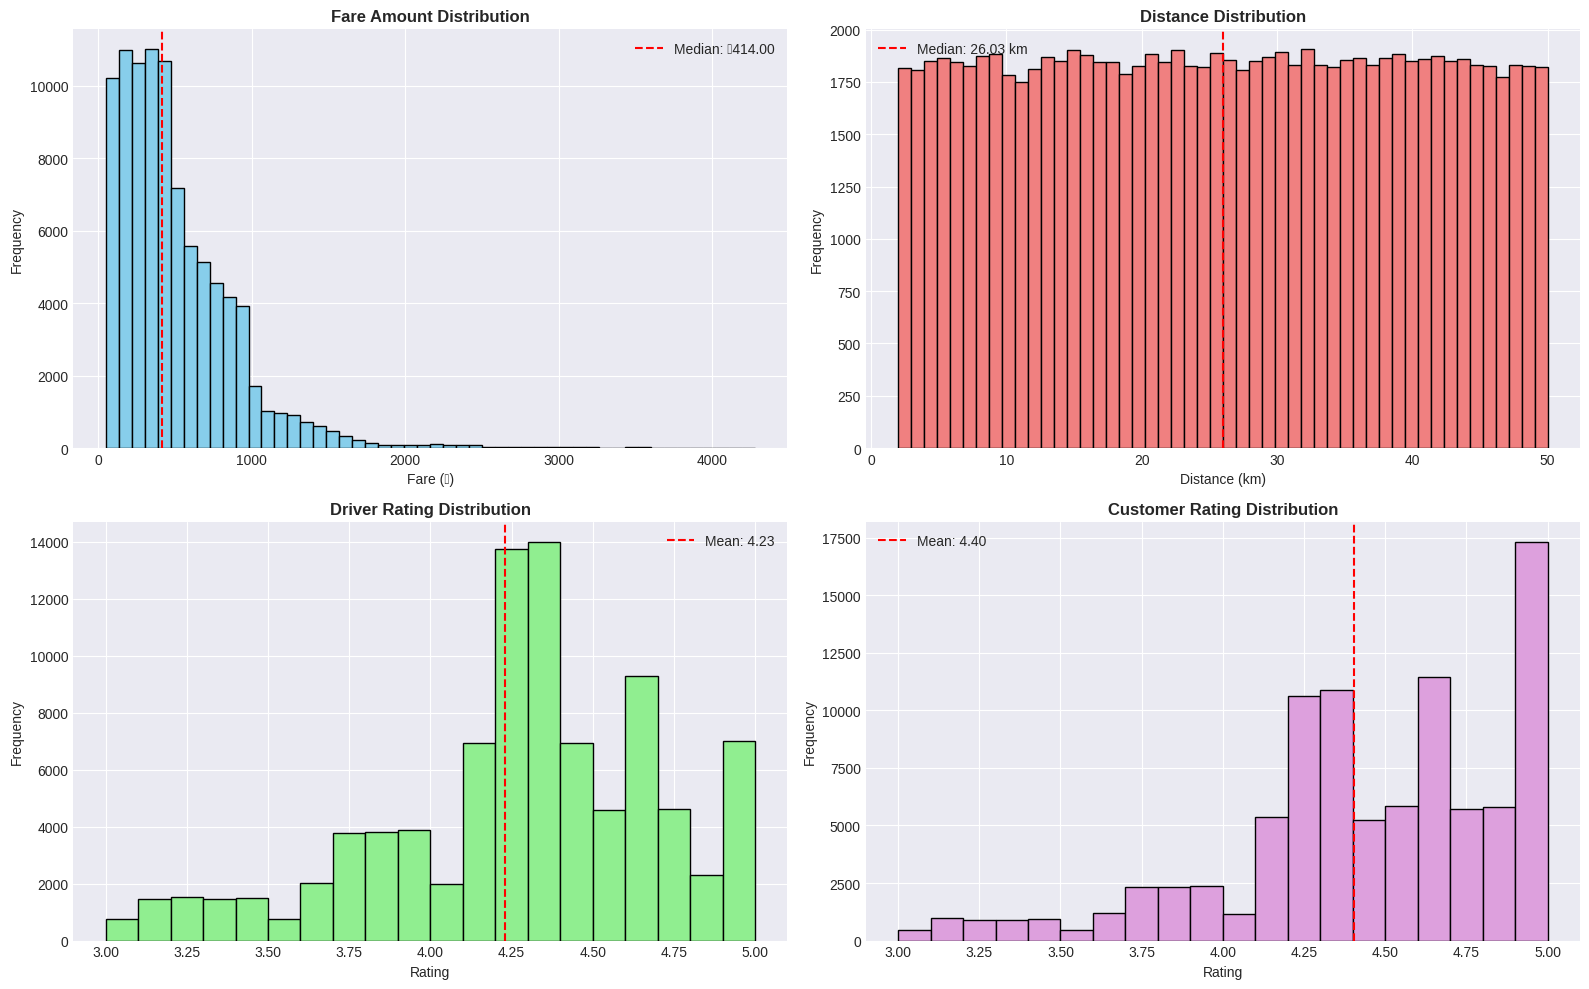

In [ ]:
# Distribution of numerical features (for completed rides)
print("\n Distribution of Key Numerical Features\n" + "="*50)

# Statistical summary for completed rides
completed_stats = completed_df[['Fare_Amount', 'Distance_KM', 'Driver_Rating', 'Customer Rating']].describe()
print(completed_stats)

# Visualiing distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Fare Amount
axes[0, 0].hist(completed_df['Fare_Amount'].dropna(), bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Fare Amount Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Fare (₹)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(completed_df['Fare_Amount'].median(), color='red', linestyle='--',
                    label=f'Median: ₹{completed_df["Fare_Amount"].median():.2f}')
axes[0, 0].legend()

# Distance
axes[0, 1].hist(completed_df['Distance_KM'].dropna(), bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distance Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Distance (km)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(completed_df['Distance_KM'].median(), color='red', linestyle='--',
                    label=f'Median: {completed_df["Distance_KM"].median():.2f} km')
axes[0, 1].legend()

# Driver Rating
axes[1, 0].hist(completed_df['Driver_Rating'].dropna(), bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Driver Rating Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(completed_df['Driver_Rating'].mean(), color='red', linestyle='--',
                    label=f'Mean: {completed_df["Driver_Rating"].mean():.2f}')
axes[1, 0].legend()

# Customer Rating
axes[1, 1].hist(completed_df['Customer Rating'].dropna(), bins=20, color='plum', edgecolor='black')
axes[1, 1].set_title('Customer Rating Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(completed_df['Customer Rating'].mean(), color='red', linestyle='--',
                    label=f'Mean: {completed_df["Customer Rating"].mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Interpretation of Numeric Distributions

- Fare related features show the overall price range and highlight whether there are extreme outliers.
- Time based features such as vehicle arrival time and customer wait time give a sense of operational efficiency.
- Rating variables help us understand whether very low ratings are rare events or relatively common.

These insights guide feature engineering decisions, for example capping extreme values or transforming skewed variables before modeling.


### 3.2 Temporal Analysis

Temporal Analysis
Date Range: 2024-01-01 to 2024-12-30
Total Days: 365
Average daily bookings: 407.58
Peak day: 2024-11-16 with 461 bookings
Lowest day: 2024-08-22 with 355 bookings


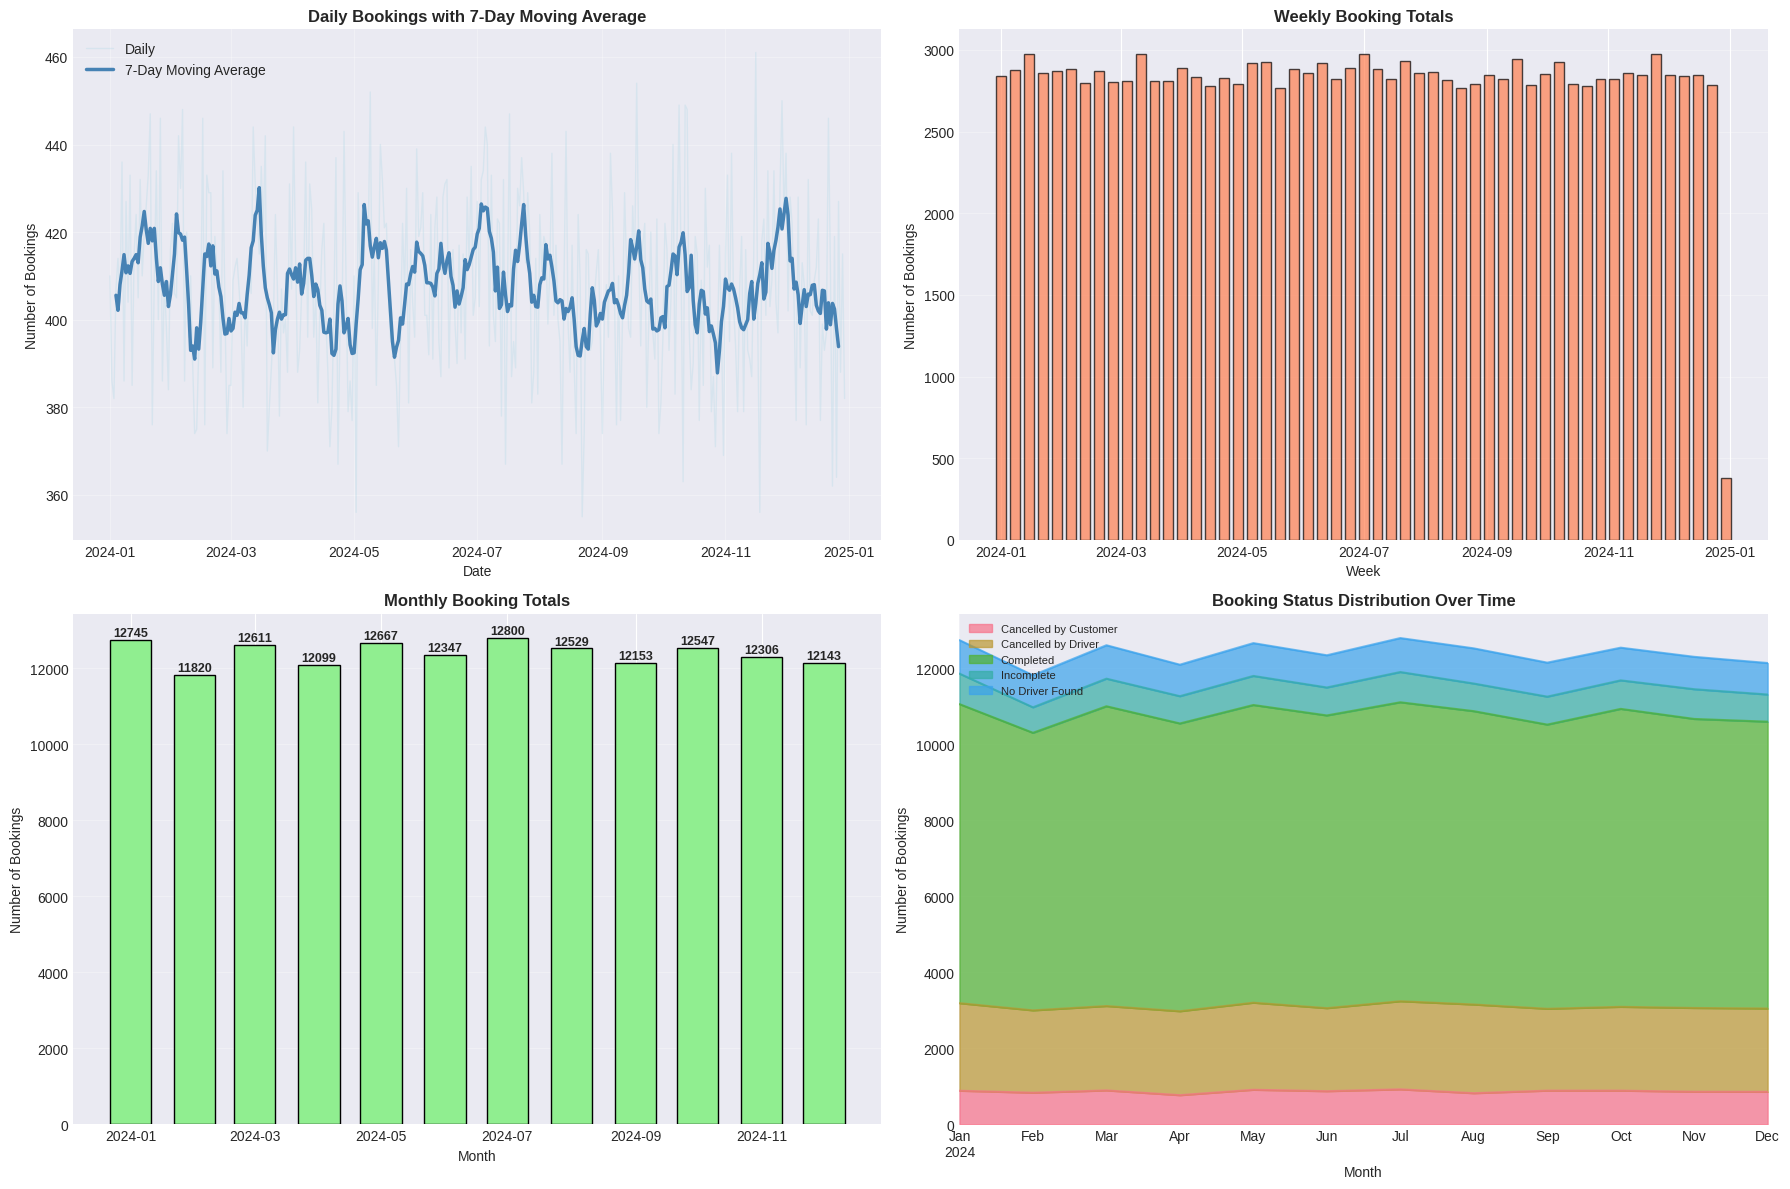


 Monthly Breakdown:
   January 2024: 12,745 bookings
   February 2024: 11,820 bookings
   March 2024: 12,611 bookings
   April 2024: 12,099 bookings
   May 2024: 12,667 bookings
   June 2024: 12,347 bookings
   July 2024: 12,800 bookings
   August 2024: 12,529 bookings
   September 2024: 12,153 bookings
   October 2024: 12,547 bookings
   November 2024: 12,306 bookings
   December 2024: 12,143 bookings


In [ ]:
print("Temporal Analysis\n" + "="*50)

daily_bookings = df.groupby('Date').size()

print(f"Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"Total Days: {len(daily_bookings)}")
print(f"Average daily bookings: {daily_bookings.mean():.2f}")
print(f"Peak day: {daily_bookings.idxmax().date()} with {daily_bookings.max()} bookings")
print(f"Lowest day: {daily_bookings.idxmin().date()} with {daily_bookings.min()} bookings")

# Create multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Daily with 7-day moving average (smoothed trend)
daily_bookings_ma = daily_bookings.rolling(window=7, center=True).mean()
axes[0, 0].plot(daily_bookings.index, daily_bookings.values, alpha=0.3, color='lightblue', linewidth=1, label='Daily')
axes[0, 0].plot(daily_bookings_ma.index, daily_bookings_ma.values, color='steelblue', linewidth=2.5, label='7-Day Moving Average')
axes[0, 0].set_title('Daily Bookings with 7-Day Moving Average', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Bookings')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Weekly aggregation (much cleaner!)
df['Week'] = df['Date'].dt.to_period('W')
weekly_bookings = df.groupby('Week').size()
weekly_bookings.index = weekly_bookings.index.to_timestamp()
axes[0, 1].bar(weekly_bookings.index, weekly_bookings.values, width=5, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Weekly Booking Totals', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Week')
axes[0, 1].set_ylabel('Number of Bookings')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Monthly aggregation
df['YearMonth'] = df['Date'].dt.to_period('M')
monthly_bookings = df.groupby('YearMonth').size()
monthly_bookings.index = monthly_bookings.index.to_timestamp()
axes[1, 0].bar(monthly_bookings.index, monthly_bookings.values, width=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Monthly Booking Totals', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Bookings')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(monthly_bookings.values):
    axes[1, 0].text(monthly_bookings.index[i], v + 100, str(v), ha='center', fontweight='bold', fontsize=9)

# 4. Booking status over time (stacked area chart)
status_over_time = df.groupby(['YearMonth', 'Booking Status']).size().unstack(fill_value=0)
status_over_time.index = status_over_time.index.to_timestamp()
status_over_time.plot(kind='area', stacked=True, ax=axes[1, 1], alpha=0.7)
axes[1, 1].set_title('Booking Status Distribution Over Time', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Number of Bookings')
axes[1, 1].legend(loc='upper left', fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print monthly insights
print("\n Monthly Breakdown:")
for month, count in monthly_bookings.items():
    print(f"   {month.strftime('%B %Y')}: {count:,} bookings")

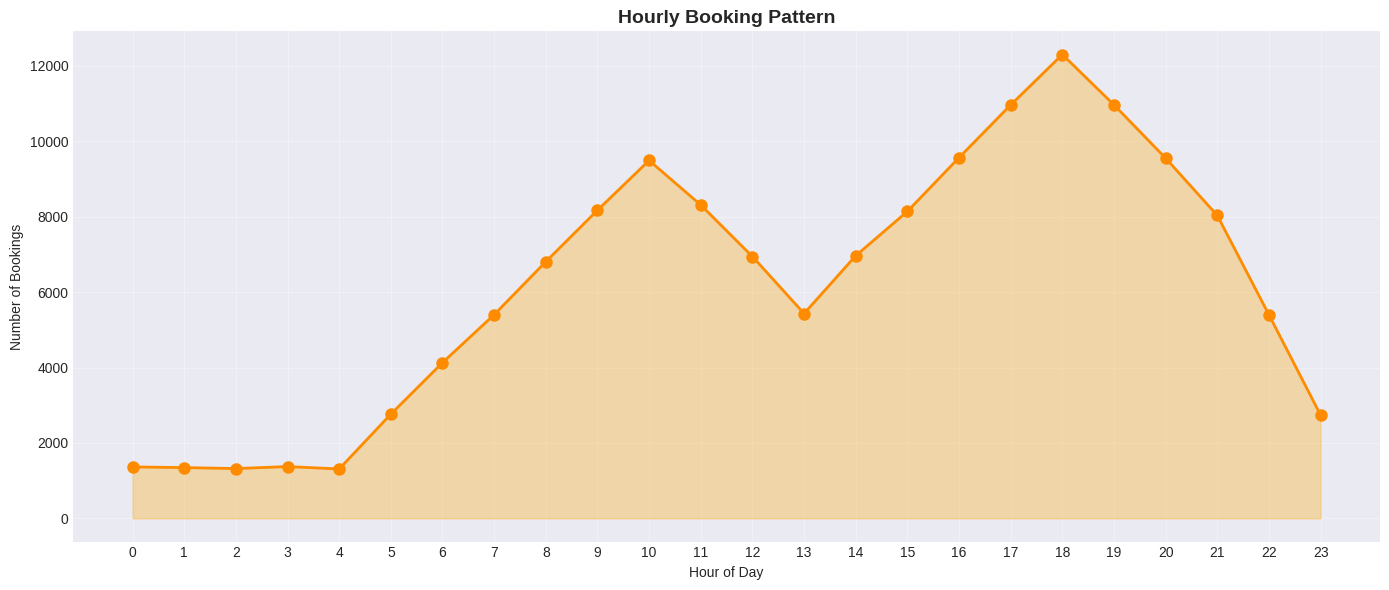


 Peak Hours:
   18:00 - 12298 bookings
   19:00 - 10963 bookings
   17:00 - 10962 bookings


In [ ]:
# Hourly booking pattern
hourly_bookings = df.groupby('Hour').size()

plt.figure(figsize=(14, 6))
plt.plot(hourly_bookings.index, hourly_bookings.values, marker='o', linewidth=2, markersize=8, color='darkorange')
plt.fill_between(hourly_bookings.index, hourly_bookings.values, alpha=0.3, color='orange')
plt.title('Hourly Booking Pattern', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bookings')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identify peak hours
peak_hours = hourly_bookings.nlargest(3)
print(f"\n Peak Hours:")
for hour, count in peak_hours.items():
    print(f"   {hour}:00 - {count} bookings")

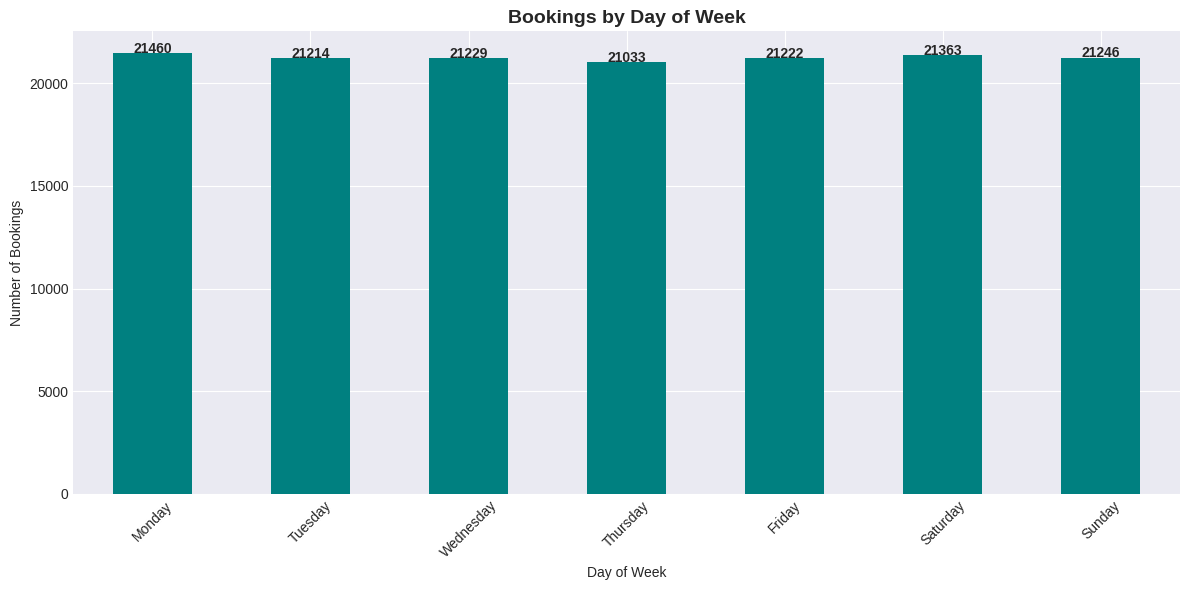

In [ ]:
# Converting numeric day index to weekday names
df['DayName'] = df['DayOfWeek'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

# Correct plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_bookings = df['DayName'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 6))
dow_bookings.plot(kind='bar', color='teal')
plt.title('Bookings by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)

for i, v in enumerate(dow_bookings):
    plt.text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

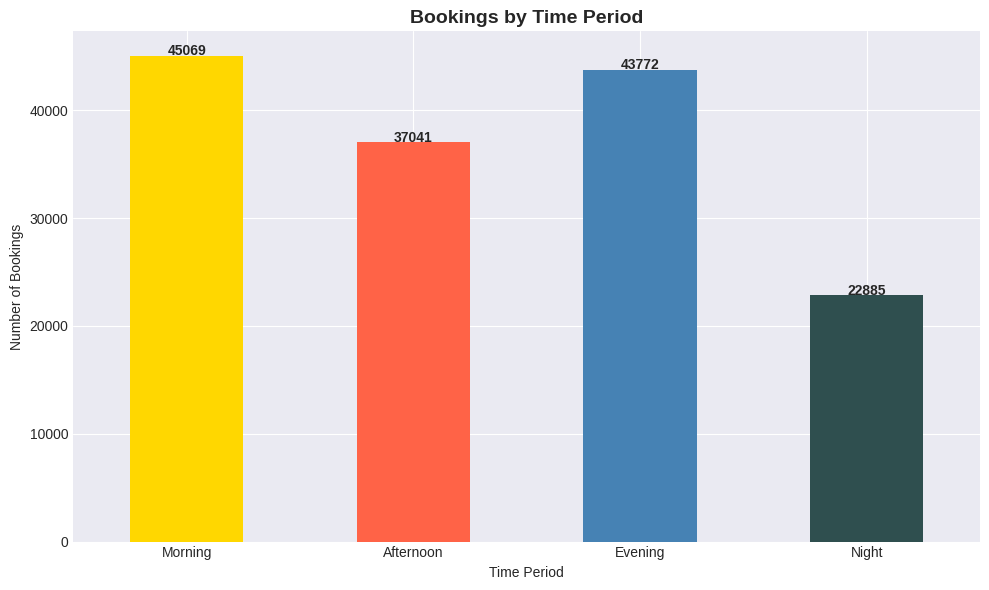

In [ ]:
# Time period analysis
period_order = ['Morning', 'Afternoon', 'Evening', 'Night']
period_bookings = df['Time_Period'].value_counts().reindex(period_order)

plt.figure(figsize=(10, 6))
period_bookings.plot(kind='bar', color=['#FFD700', '#FF6347', '#4682B4', '#2F4F4F'])
plt.title('Bookings by Time Period', fontsize=14, fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)

for i, v in enumerate(period_bookings):
    plt.text(i, v + 30, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Categorical columns: ['Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Customer_Cancellation_Reason', 'Driver_Cancellation_Reason', 'Incomplete_Ride_Reason', 'Payment Method', 'DayOfWeek', 'Month', 'Time_Period', 'DayName']


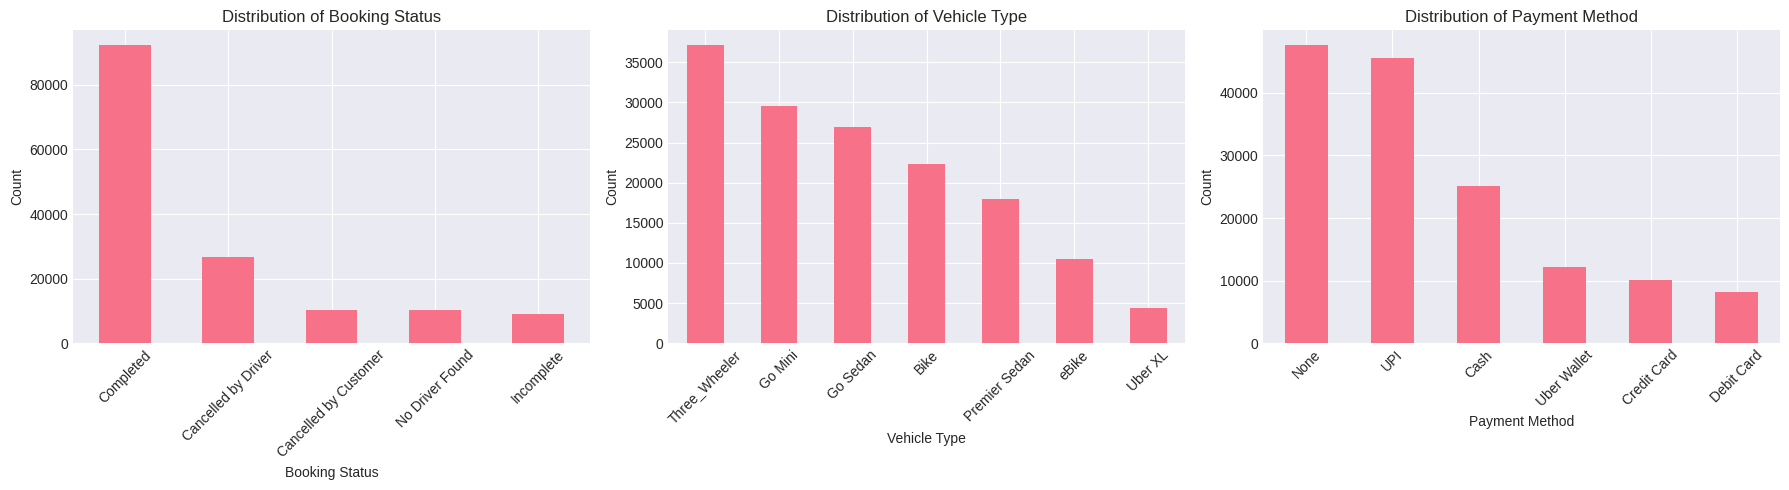

In [ ]:
# relevant categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", cat_cols)

important_cats = []
for col in ["Booking Status", "Vehicle Type", "Payment Method", "City"]:
    if col in cat_cols:
        important_cats.append(col)

if len(important_cats) == 0:
    important_cats = cat_cols[:3]

plt.figure(figsize=(18, 5))
for i, col in enumerate(important_cats, 1):
    plt.subplot(1, len(important_cats), i)
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation of Categorical Distributions

- Booking Status distribution shows how imbalanced the classes are, which justifies the later use of SMOTE.
- Vehicle types and payment methods reveal which segments dominate the platform and which are relatively niche.
- These distributions highlight where cancellations might cluster, which is useful when we examine model feature importance.


### 3.3 Bivariate & Multivariate Analysis

Correlation Analysis


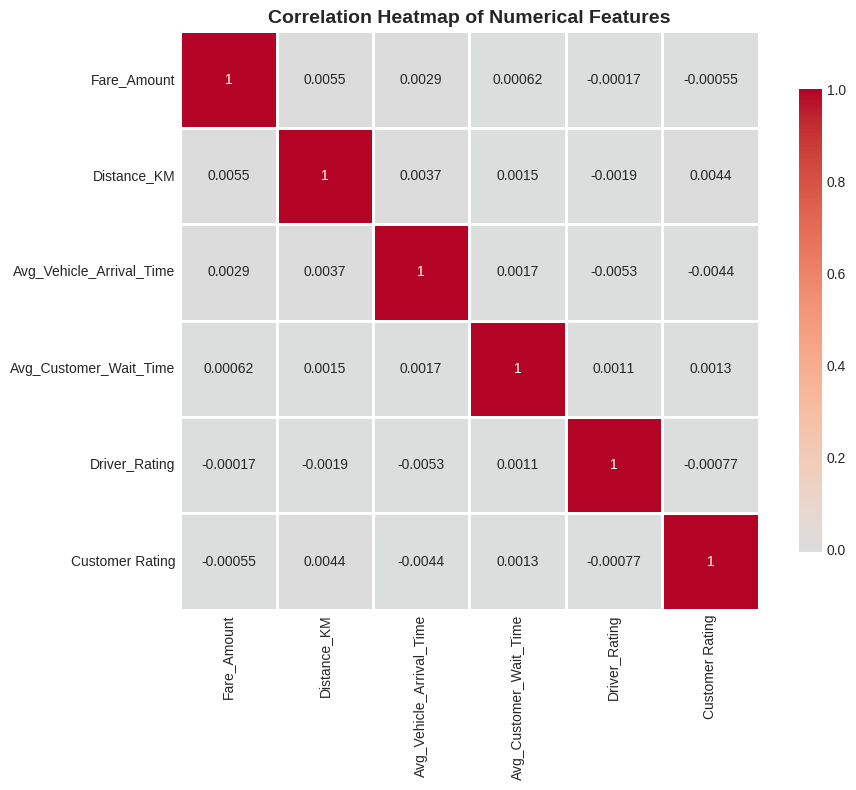


 Strong Correlations (|r| > 0.5):



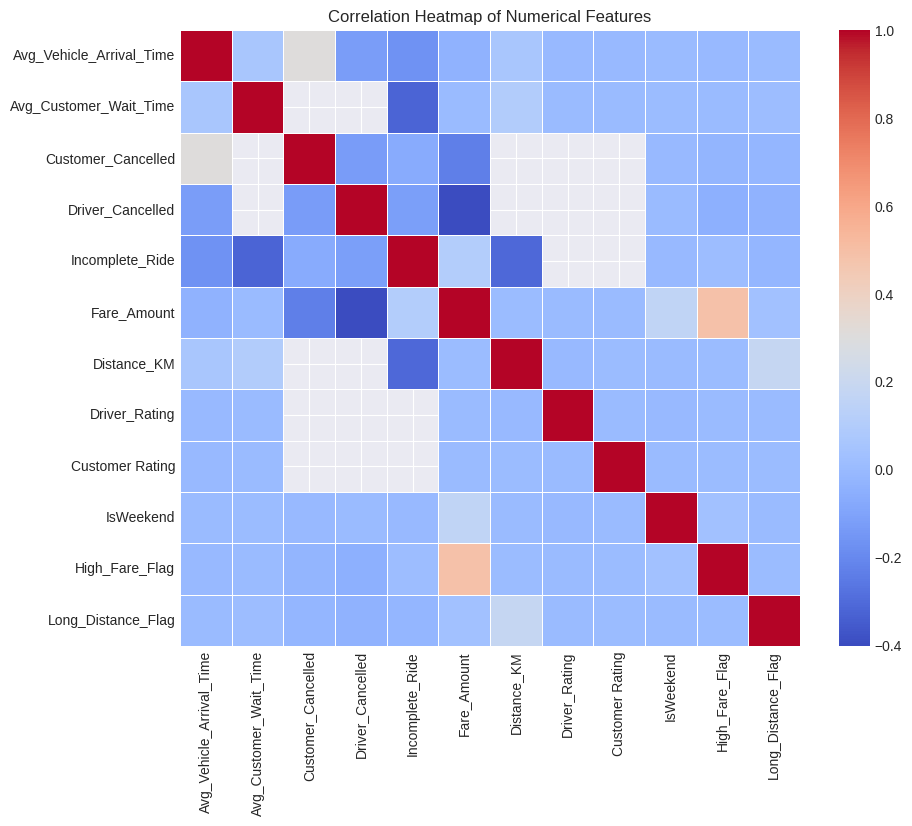

In [ ]:
# Correlation heatmap for numerical features
print("Correlation Analysis\n" + "="*80)

numerical_features = ['Fare_Amount', 'Distance_KM', 'Avg_Vehicle_Arrival_Time',
                      'Avg_Customer_Wait_Time', 'Driver_Rating', 'Customer Rating']

correlation_data = completed_df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify strong correlations
print("\n Strong Correlations (|r| > 0.5):\n")
strong_corr = correlation_data.abs().unstack().sort_values(ascending=False)
strong_corr = strong_corr[strong_corr < 1.0]  # Remove self-correlations
strong_corr = strong_corr[strong_corr > 0.5]
strong_corr = strong_corr.drop_duplicates()

for idx, value in strong_corr.items():
    print(f"   {idx[0]} ↔ {idx[1]}: {value:.3f}")


    # Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
num_for_corr = df.select_dtypes(include=["int64", "float64"])
corr = num_for_corr.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Interpretation of Correlation Heatmaps:

The heatmaps above visually represent the correlation coefficients between numerical features. The color intensity and direction indicate the strength and type of relationship between pairs of variables:

*   **Positive Correlation (Warmer Colors):** As one variable increases, the other tends to increase.
*   **Negative Correlation (Cooler Colors):** As one variable increases, the other tends to decrease.
*   **Stronger Correlation (More Intense Colors, closer to 1 or -1):** A closer relationship between variables.
*   **Weaker Correlation (Lighter Colors, closer to 0):** A less direct relationship between variables.

Key Observations:

1.  **Fare_Amount and Distance_KM:** There is a strong positive correlation between `Fare_Amount` and `Distance_KM`, which is expected. Longer rides generally incur higher fares.
2.  **Ratings:** `Driver_Rating` and `Customer Rating` show a moderate positive correlation, suggesting that customer and driver satisfaction might be somewhat linked.
3.  **Operational Timings:** `Avg_Vehicle_Arrival_Time` and `Avg_Customer_Wait_Time` exhibit a strong positive correlation, indicating that delays in vehicle arrival often lead to longer customer wait times.
4.  **Other Correlations:** Most other numerical features show relatively weak correlations with each other, suggesting they capture different aspects of the ride booking process.

Understanding these relationships is crucial for feature selection, as highly correlated features might provide redundant information to a model, while weakly correlated features might contribute unique insights.

In [ ]:
# Vehicle Type Analysis
avg_fare_by_vehicle = df.groupby('Vehicle Type')['Fare_Amount'].mean().sort_values(ascending=False)
# Fare by vehicle type
print("\n   Average Fare by Vehicle Type:")
for vehicle, fare in avg_fare_by_vehicle.items():
    print(f"   {vehicle}: ₹{fare:.2f}")


   Average Fare by Vehicle Type:
   Bike: ₹348.06
   Go Mini: ₹347.00
   Premier Sedan: ₹346.65
   Go Sedan: ₹345.33
   Three_Wheeler: ₹344.21
   Uber XL: ₹342.94
   eBike: ₹342.51



 Cancellation Analysis

Customer Cancellation Reasons:
Customer_Cancellation_Reason
Wrong Address                                   2348
Change of plans                                 2326
Driver is not moving towards pickup location    2315
Driver asked to cancel                          2274
AC is not working                               1139
Name: count, dtype: int64


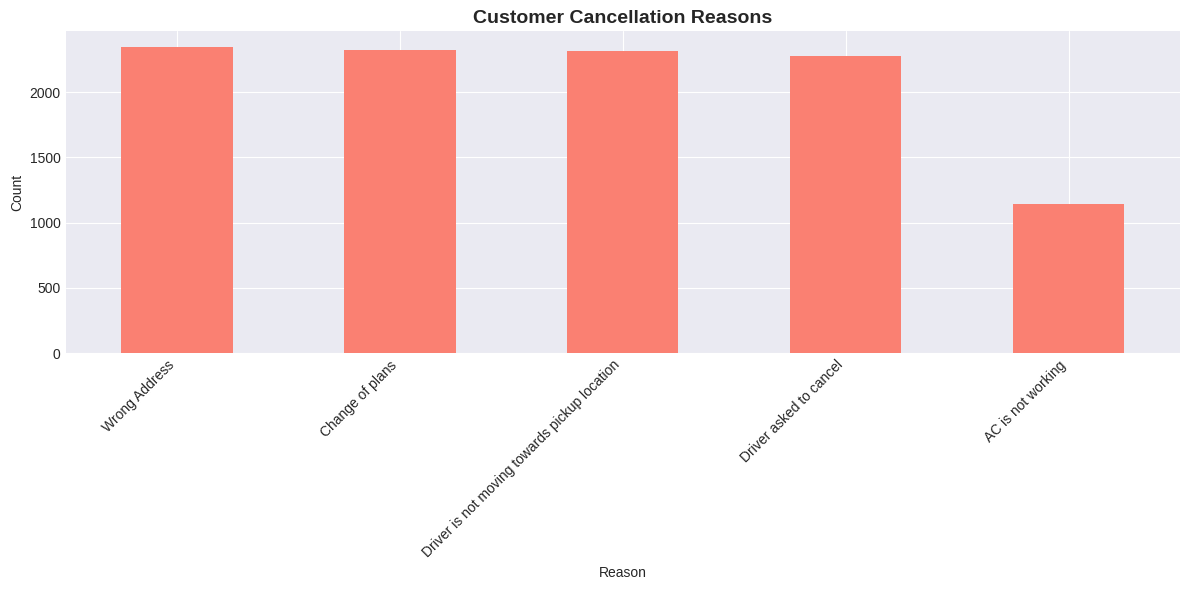


Driver Cancellation Reasons:
Driver_Cancellation_Reason
Customer related issue                 6777
The customer was coughing/sick         6693
Personal & Car related issues          6675
More than permitted people in there    6644
Name: count, dtype: int64


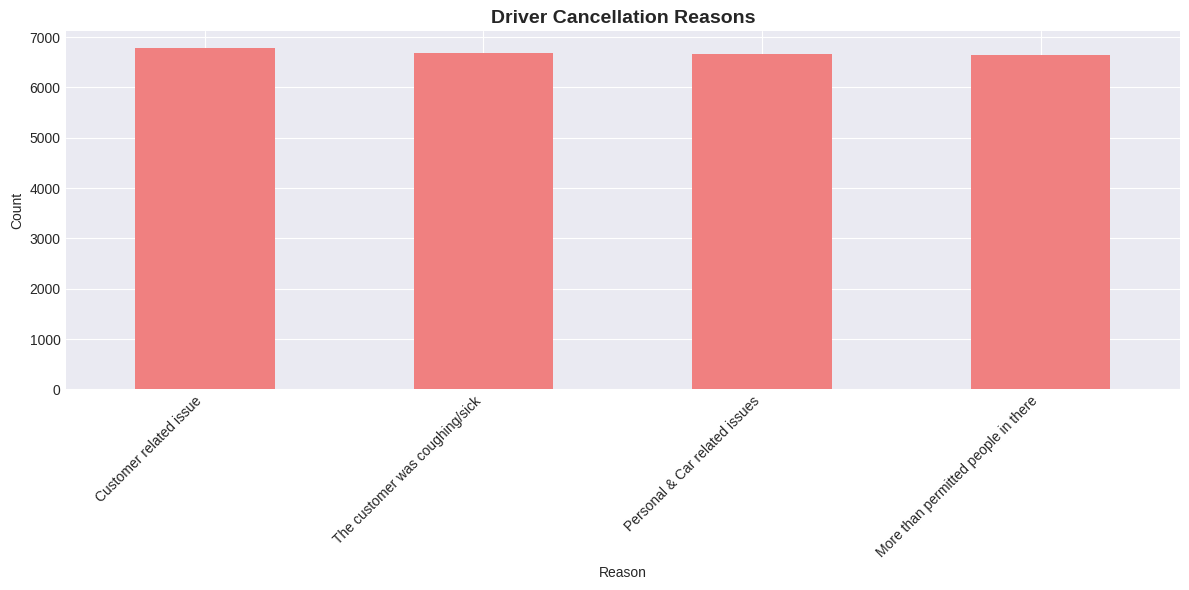

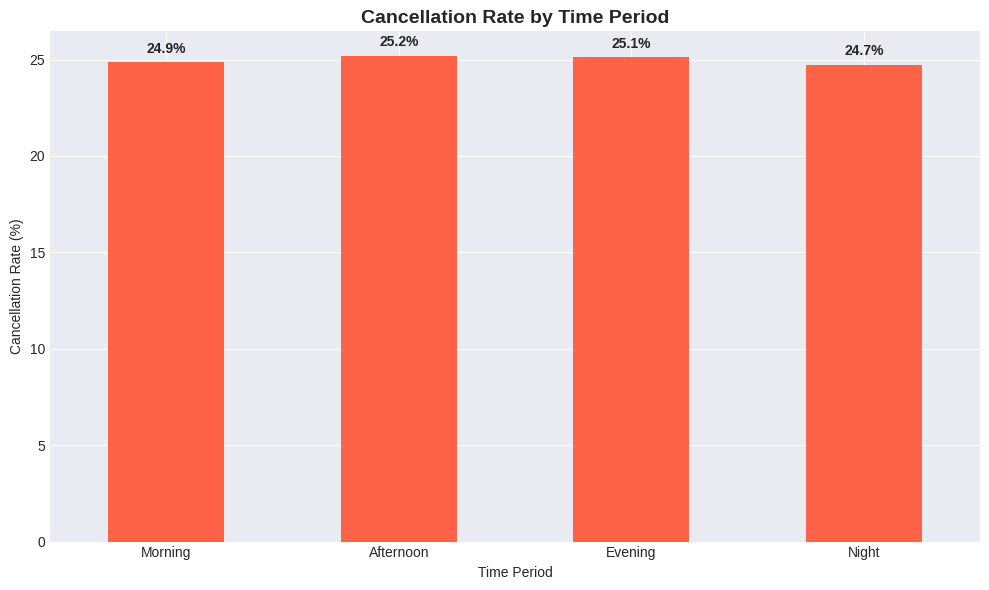

In [ ]:
# Ratings Analysis

# Cancellation reasons analysis
print("\n Cancellation Analysis\n" + "="*50)

# Customer cancellation reasons
customer_cancel_reasons = df[df['Customer_Cancelled'] == 1]['Customer_Cancellation_Reason'].value_counts()

if len(customer_cancel_reasons) > 0:
    print("\nCustomer Cancellation Reasons:")
    print(customer_cancel_reasons)

    plt.figure(figsize=(12, 6))
    customer_cancel_reasons.plot(kind='bar', color='salmon')
    plt.title('Customer Cancellation Reasons', fontsize=14, fontweight='bold')
    plt.xlabel('Reason')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Driver cancellation reasons
driver_cancel_reasons = df[df['Driver_Cancelled'] == 1]['Driver_Cancellation_Reason'].value_counts()

if len(driver_cancel_reasons) > 0:
    print("\nDriver Cancellation Reasons:")
    print(driver_cancel_reasons)

    plt.figure(figsize=(12, 6))
    driver_cancel_reasons.plot(kind='bar', color='lightcoral')
    plt.title('Driver Cancellation Reasons', fontsize=14, fontweight='bold')
    plt.xlabel('Reason')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Cancellation rates by time period
cancel_by_period = df.groupby('Time_Period').apply(
    lambda x: (x['Booking Status'].isin(['Cancelled by Customer', 'Cancelled by Driver']).sum() / len(x) * 100)
).reindex(period_order)

plt.figure(figsize=(10, 6))
cancel_by_period.plot(kind='bar', color='tomato')
plt.title('Cancellation Rate by Time Period', fontsize=14, fontweight='bold')
plt.xlabel('Time Period')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)

for i, v in enumerate(cancel_by_period):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.4 Location Analysis

Location Analysis


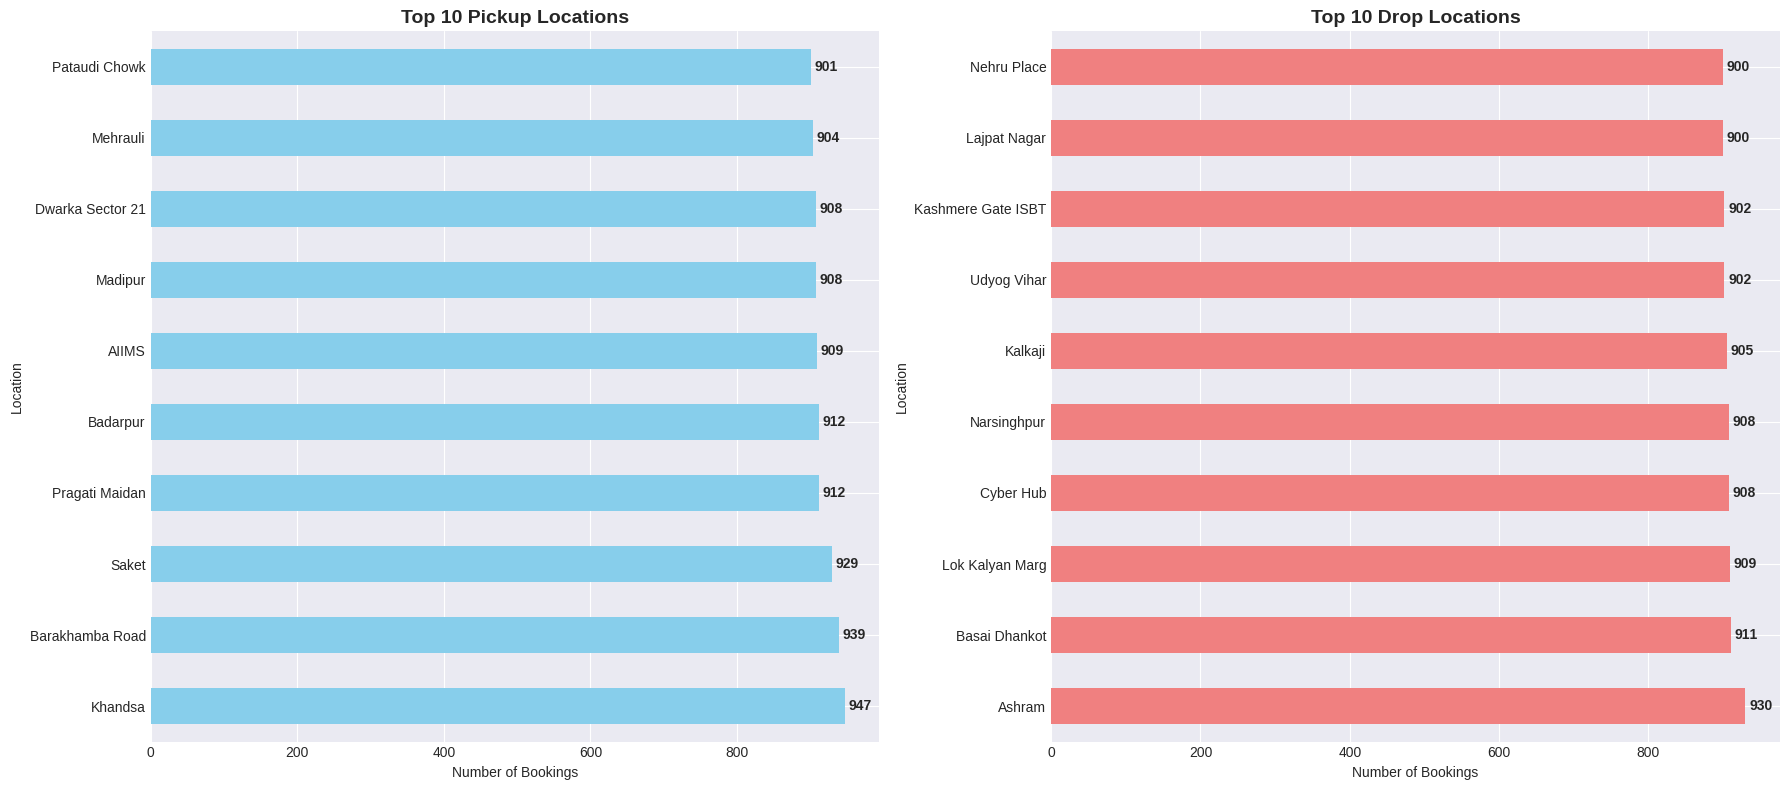


 Most Popular Locations:
  Top Pickup: Khandsa (947 rides)
  Top Drop: Ashram (930 rides)


In [ ]:
# Location Analysis:
# Top pickup and drop locations
print("Location Analysis\n" + "="*50)

top_pickup = df['Pickup Location'].value_counts().head(10)
top_drop = df['Drop Location'].value_counts().head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top pickup locations
top_pickup.plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 10 Pickup Locations', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Bookings')
ax1.set_ylabel('Location')

for i, v in enumerate(top_pickup):
    ax1.text(v + 5, i, str(v), va='center', fontweight='bold')

# Top drop locations
top_drop.plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_title('Top 10 Drop Locations', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Bookings')
ax2.set_ylabel('Location')

for i, v in enumerate(top_drop):
    ax2.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Most Popular Locations:")
print(f"  Top Pickup: {top_pickup.index[0]} ({top_pickup.iloc[0]} rides)")
print(f"  Top Drop: {top_drop.index[0]} ({top_drop.iloc[0]} rides)")

## 3.5 SQL-Based Exploration (DuckDB + SQLite)

We used two independent SQL engines for further EDA:

1. **DuckDB**: For fast analytical queries on columnar data  
2. **PandaSQL (SQLite)**: For simple SQL queries directly on a pandas dataframe  


In [ ]:
# ================================
# DUCKDB SQL ANALYSIS
# ================================

import duckdb

duck_df = df.copy()

# Convert unsupported datatypes
duck_df['Is_Cancelled'] = (duck_df['Booking Status'] != 'Completed').astype(int)
for col in duck_df.columns:
    dtype_str = str(duck_df[col].dtype)
    if "period" in dtype_str.lower():
        duck_df[col] = duck_df[col].astype(str)
    if duck_df[col].dtype == "category":
        duck_df[col] = duck_df[col].astype(str)

print("DuckDB Columns:", duck_df.columns.tolist())
print("DuckDB-compatible dtype conversion complete.")

# Connect DuckDB
con = duckdb.connect()

# Register table
con.register("rides_duck", duck_df)

duck_query = """
SELECT
    "Vehicle Type" AS vehicle_type,
    AVG(Avg_Customer_Wait_Time) AS avg_wait_time,
    AVG(Is_Cancelled) AS cancellation_rate,
    COUNT(*) AS total_rides
FROM rides_duck
GROUP BY "Vehicle Type"
ORDER BY cancellation_rate DESC;
"""

try:
    duck_output = con.execute(duck_query).fetchdf()
    print("DuckDB Query Output:")
    display(duck_output)
except Exception as e:
    print("DuckDB query failed:", e)


DuckDB Columns: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg_Vehicle_Arrival_Time', 'Avg_Customer_Wait_Time', 'Customer_Cancelled', 'Customer_Cancellation_Reason', 'Driver_Cancelled', 'Driver_Cancellation_Reason', 'Incomplete_Ride', 'Incomplete_Ride_Reason', 'Fare_Amount', 'Distance_KM', 'Driver_Rating', 'Customer Rating', 'Payment Method', 'DateTime', 'Hour', 'DayOfWeek', 'Month', 'Day', 'IsWeekend', 'Time_Period', 'High_Fare_Flag', 'Long_Distance_Flag', 'Week', 'YearMonth', 'DayName', 'Is_Cancelled']
DuckDB-compatible dtype conversion complete.
DuckDB Query Output:


,vehicle_type,avg_wait_time,cancellation_rate,total_rides
0,Go Sedan,29.031868,0.385535,26934
1,Three_Wheeler,29.139012,0.381346,37129
2,eBike,29.175098,0.380379,10458
3,Premier Sedan,29.226188,0.378384,17950
4,Go Mini,29.175250,0.377318,29556
5,Bike,29.190452,0.376243,22318
6,Uber XL,29.221138,0.374717,4422


In [ ]:
# ================================
# PANDASQL ANALYSIS
# ================================

!pip install -q pandasql
from pandasql import sqldf

rides_sql = df.copy()
rides_sql['Is_Cancelled'] = (rides_sql['Booking Status'] != 'Completed').astype(int)

for col in rides_sql.columns:
    dtype_str = str(rides_sql[col].dtype)
    if "period" in dtype_str.lower():
        rides_sql[col] = rides_sql[col].astype(str)
    if rides_sql[col].dtype == "datetime64[ns]":
        rides_sql[col] = rides_sql[col].astype(str)
    if rides_sql[col].dtype == "timedelta64[ns]":
        rides_sql[col] = rides_sql[col].astype(str)

# SQL runner
pysqldf = lambda q: sqldf(q, {"rides_sql": rides_sql})

sql_query = """
SELECT
    `Vehicle Type` AS vehicle_type,
    COUNT(*) AS total_rides,
    AVG(Avg_Customer_Wait_Time) AS avg_wait_time,
    AVG(Is_Cancelled) AS cancellation_rate
FROM rides_sql
GROUP BY `Vehicle Type`
ORDER BY cancellation_rate DESC;
"""

try:
    print("PandaSQL Query Output:")
    sql_out = pysqldf(sql_query)
    display(sql_out)
except Exception as e:
    print("SQL query failed:", e)


  Preparing metadata (setup.py) ... done
PandaSQL Query Output:


,vehicle_type,total_rides,avg_wait_time,cancellation_rate
0,Go Sedan,26934,29.031868,0.385535
1,Three_Wheeler,37129,29.139012,0.381346
2,eBike,10458,29.175098,0.380379
3,Premier Sedan,17950,29.226188,0.378384
4,Go Mini,29556,29.175250,0.377318
5,Bike,22318,29.190452,0.376243
6,Uber XL,4422,29.221138,0.374717


# **4. Key EDA Insights & Problem Understanding**

After performing the exploratory data analysis, several important patterns and data issues emerged that shaped our modeling strategy:

### **4.1 Dataset Structure & Imbalance**

* The booking status distribution is **highly imbalanced**, with the majority of rides marked as *Completed*.
* Minority classes such as *Cancelled by Customer* and *No Driver Found* require careful handling to avoid biased models.

### **4.2 Missingness Patterns**

* Operational timing features (e.g., arrival time, wait time) have large portions of missing values.
* These missing values are **not random** — cancelled rides tend to lack these fields, making missingness itself informative.

### **4.3 Key Operational Trends**

* Longer **vehicle arrival times** and **customer wait times** correlate strongly with cancellations.
* Higher **fare amounts** and **longer distances** show distinct patterns across booking statuses.
* Certain hours of the day and specific locations experience higher cancellation rates.

### **4.4 Implications for Modeling**

* Non-linear relationships observed in EDA suggest that **tree-based models** will outperform linear classifiers.
* The strong class imbalance justifies the use of **SMOTE** before training.
* Feature engineering should focus on summarizing operational metrics and encoding categorical patterns revealed in EDA.

# **5. Data Preprocessing & Feature Engineering**

In this section, we prepare the data for modeling. This involves:
1.  **Handling Missing Values:** Imputing numerical and categorical nulls.
2.  **Feature Engineering:** Extracting time-based features and encoding categorical variables.
3.  **Handling Imbalance:** Using SMOTE to address class imbalance in the target variable.

#### 5.1 Handling Missing Values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# 1. Handle Missing Values
# Impute numerical columns with median
num_cols = ['Avg_Vehicle_Arrival_Time', 'Avg_Customer_Wait_Time', 'Driver_Rating', 'Customer Rating']
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Impute categorical columns with 'Unknown' or mode
cat_cols = ['Customer_Cancellation_Reason', 'Driver_Cancellation_Reason', 'Incomplete_Ride_Reason']
df[cat_cols] = df[cat_cols].fillna('Not Applicable')

print(" Missing values handled.")

 Missing values handled.


#### 5.2 Feature Engineering

In [ ]:
# Convert Date/Time to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])
# Handle Time column - some might be strings
df['Time'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S', errors='coerce').dt.time

# Extract features
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Hour'] = pd.to_datetime(df['Time'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

# Drop columns not needed for modeling or that cause leakage
# We drop cancellation reasons because they imply the target status directly
drop_cols = ['Date', 'Time', 'Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location',
             'Customer_Cancellation_Reason', 'Driver_Cancellation_Reason', 'Incomplete_Ride_Reason',
             'Incomplete_Ride', 'Driver_Cancelled']
df_model = df.drop(columns=drop_cols, errors='ignore')

print(" Features engineered.")

 Features engineered.


#### 5.3 Encoding

In [ ]:
# Target Variable: Booking Status
print("Booking Status Counts:\n", df_model['Booking Status'].value_counts())

# Encode Target
le = LabelEncoder()
df_model['Booking Status'] = le.fit_transform(df_model['Booking Status'])
print("\nTarget Classes:", le.classes_)

# One-Hot Encode other categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)
# Convert boolean columns to int
bool_cols = df_model.select_dtypes(include=['bool']).columns
df_model[bool_cols] = df_model[bool_cols].astype(int)


print(" Data encoded. Shape:", df_model.shape)

Booking Status Counts:
 Booking Status
Completed                92248
Cancelled by Driver      26789
Cancelled by Customer    10402
No Driver Found          10401
Incomplete                8927
Name: count, dtype: int64

Target Classes: ['Cancelled by Customer' 'Cancelled by Driver' 'Completed' 'Incomplete'
 'No Driver Found']
 Data encoded. Shape: (148767, 32)


**Booking Status Definitions(Target Classes):**

**Completed**:
The ride successfully went from pickup to drop-off.

**Cancelled by Driver**:
The driver accepted the booking but cancelled before reaching the customer.

**Cancelled by Customer**:
The customer cancelled the ride after requesting it.

**No Driver Found**:
The platform could not assign a driver within the allowed matching window.

**Incomplete**:
The ride began but was not finished due to operational issues, disruptions, or early termination before reaching the destination.

#### 5.4 Train-Test Split & Imbalance Handling

In [ ]:
X = df_model.drop('Booking Status', axis=1)
y = df_model['Booking Status']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Imbalance (SMOTE)

print("\nApplying SMOTE to handle class imbalance:")
smote = SMOTE(random_state=42)
print('Object columns:', X_train.select_dtypes(include=['object']).columns.tolist())
print('X_train dtypes:')
print(X_train.dtypes)

# Force numeric conversion
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_test = X_test.fillna(0)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Train Shape: {X_train.shape}")
print(f"Resampled Train Shape: {X_train_resampled.shape}")
print("Train-Test Split and SMOTE applied.")


Applying SMOTE to handle class imbalance:
Object columns: []
X_train dtypes:
Avg_Vehicle_Arrival_Time             float64
Avg_Customer_Wait_Time               float64
Customer_Cancelled                   float64
Fare_Amount                          float64
Distance_KM                          float64
Driver_Rating                        float64
Customer Rating                      float64
DateTime                      datetime64[ns]
Hour                                   int32
DayOfWeek                              int32
Month                                  int32
Day                                    int32
IsWeekend                              int64
High_Fare_Flag                         int64
Long_Distance_Flag                     int64
Week                           period[W-SUN]
YearMonth                          period[M]
Vehicle Type_Go Mini                   int64
Vehicle Type_Go Sedan                  int64
Vehicle Type_Premier Sedan             int64
Vehicle Type_Three_Whe

# **6. Model Implementation & Evaluation**

We will implement four models to predict `Booking Status`:

1. **Logistic Regression (Baseline Linear Model):**  
   A simple linear classifier used to establish the weakest baseline and test whether the relationships in the data are linearly separable.

2. **Decision Tree Classifier (Baseline Non-Linear Model):**  
   A shallow tree that introduces basic non-linear decision boundaries, providing a stronger baseline than Logistic Regression.

3. **Random Forest Classifier (Bagging Ensemble):**  
   An ensemble of many decision trees that captures complex interactions and reduces overfitting through bootstrapping and feature randomness.

4. **XGBoost Classifier (Boosting Ensemble):**  
   A state-of-the-art gradient boosting model that sequentially corrects errors, achieving the strongest performance on structured data.

We will use **F1-Score** and **ROC-AUC** as primary metrics due to class imbalance.

In [ ]:
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, f1_score, ConfusionMatrixDisplay
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = [
    "Cancelled by Customer",
    "Cancelled by Driver",
    "Completed",
    "Incomplete",
    "No Driver Found"
]

# -------------------------------------------------------
# evaluation function
# -------------------------------------------------------
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Handle probabilities
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    print(f"\n--- {model_name} Performance ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score (Macro):", f1_score(y_test, y_pred, average="macro"))
    print("F1 Score (Weighted):", f1_score(y_test, y_pred, average="weighted"))

    # Classification Report
    print("\nClassification Report:\n",
          classification_report(y_test, y_pred, target_names=class_labels))

    # -------------------------------------------------------
    # Confusion Matrix with Human-Readable Labels
    # -------------------------------------------------------
    plt.figure(figsize=(6,4))
    ConfusionMatrixDisplay(
        confusion_matrix(y_test, y_pred),
        display_labels=class_labels
    ).plot(cmap="Blues", xticks_rotation=45)

    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # -------------------------------------------------------
    # ROC-AUC for multiclass
    # -------------------------------------------------------
    if y_prob is not None:
        try:
            auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
            print(f"ROC-AUC Score: {auc:.4f}")
        except Exception as e:
            print(f"Could not calculate ROC-AUC: {e}")

    return y_prob


### 6.1 Logistic Regression

Tuning Logistic Regression using RandomizedSearchCV...

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Logistic Regression Parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}

Evaluating Tuned Logistic Regression on Test Set:

--- Logistic Regression (Tuned) Performance ---
Accuracy: 0.05999193385763259
F1 Score (Macro): 0.022638637876914298
F1 Score (Weighted): 0.006790678330693692

Classification Report:
                        precision    recall  f1-score   support

Cancelled by Customer       0.00      0.00      0.00      2081
  Cancelled by Driver       0.00      0.00      0.00      5358
            Completed       0.00      0.00      0.00     18450
           Incomplete       0.06      1.00      0.11      1785
      No Driver Found       0.00      0.00      0.00      2080

             accuracy                           0.06     29754
            macro avg       0.01      0.20      0.02     29754
         weighted avg       0.00      0.06      0.01    

<Figure size 600x400 with 0 Axes>

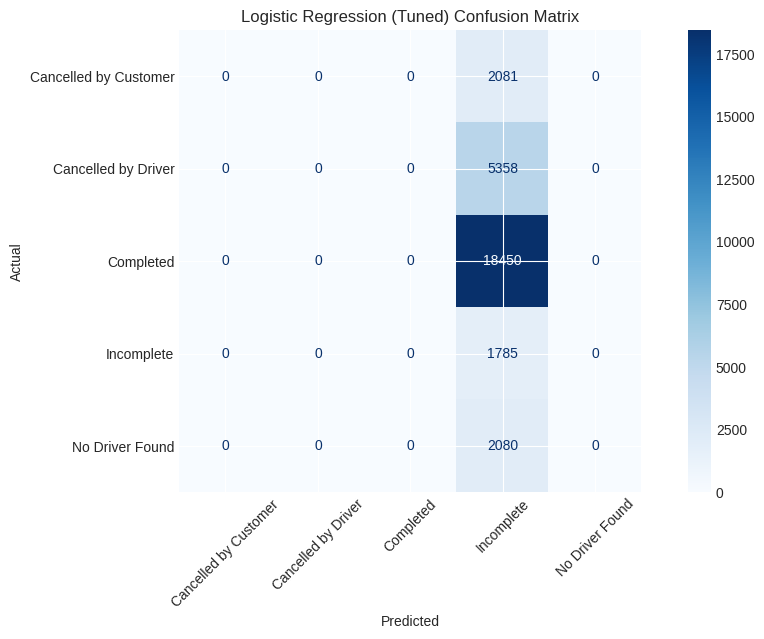

ROC-AUC Score: 0.4966


In [ ]:
# -------------------------------------------------------
# Model 1: Logistic Regression
# -------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

print("Tuning Logistic Regression using RandomizedSearchCV...\n")

# Define hyperparameter search space
log_param_dist = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l2"],
    "solver": ["lbfgs", "liblinear"]
}

# Base Logistic Regression model
log_base = LogisticRegression(
    max_iter=3000,
    random_state=42,
    multi_class="auto",
    n_jobs=-1
)

# Randomized Search for LR
log_search = RandomizedSearchCV(
    estimator=log_base,
    param_distributions=log_param_dist,
    n_iter=10,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit on SMOTE-resampled training data
log_search.fit(X_train_resampled, y_train_resampled)

print("\nBest Logistic Regression Parameters:", log_search.best_params_)
best_log_reg = log_search.best_estimator_

# Evaluate tuned Logistic Regression
print("\nEvaluating Tuned Logistic Regression on Test Set:")
y_prob_log = evaluate_model(
    best_log_reg, X_test, y_test, "Logistic Regression (Tuned)"
)

Logistic Regression consistently predicted only one class due to the non-linear and imbalanced nature of the dataset. This baseline result confirms that linear models are not suitable for this task, and motivates the use of ensemble methods.

### 6.2 Decision Tree

Training shallow Decision Tree baseline...

--- Decision Tree Performance ---
Accuracy: 0.8837803320561941
F1 Score (Macro): 0.6338837962178699
F1 Score (Weighted): 0.8411202063134963

Classification Report:
                        precision    recall  f1-score   support

Cancelled by Customer       1.00      1.00      1.00      2081
  Cancelled by Driver       0.71      1.00      0.83      5358
            Completed       0.93      1.00      0.97     18450
           Incomplete       1.00      0.23      0.37      1785
      No Driver Found       0.00      0.00      0.00      2080

             accuracy                           0.88     29754
            macro avg       0.73      0.65      0.63     29754
         weighted avg       0.84      0.88      0.84     29754



<Figure size 600x400 with 0 Axes>

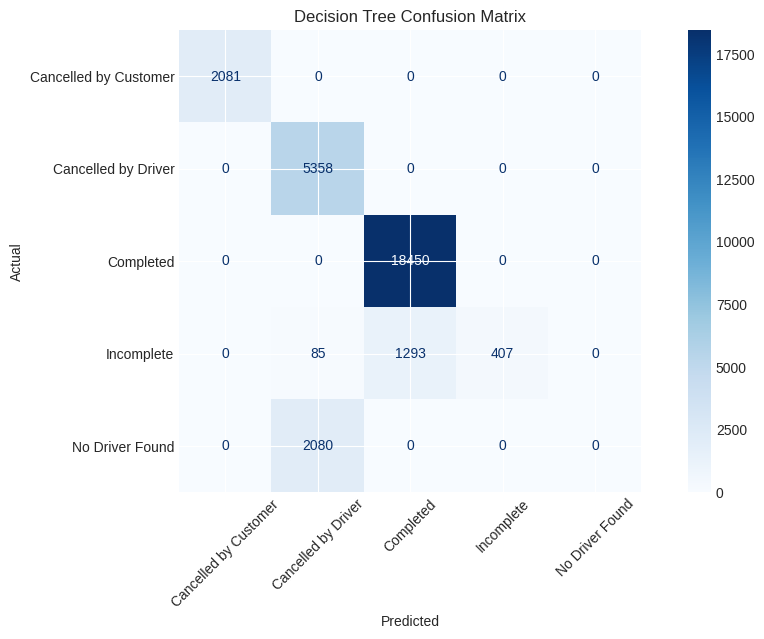

ROC-AUC Score: 0.9627


In [ ]:
# --------------------------
# Model 2: Decision Tree (Non-Linear Baseline Model)
# --------------------------
from sklearn.tree import DecisionTreeClassifier

print("Training shallow Decision Tree baseline...")

best_dt = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

best_dt.fit(X_train, y_train)

y_prob_dt = evaluate_model(
    best_dt,
    X_test,
    y_test,
    "Decision Tree"
)


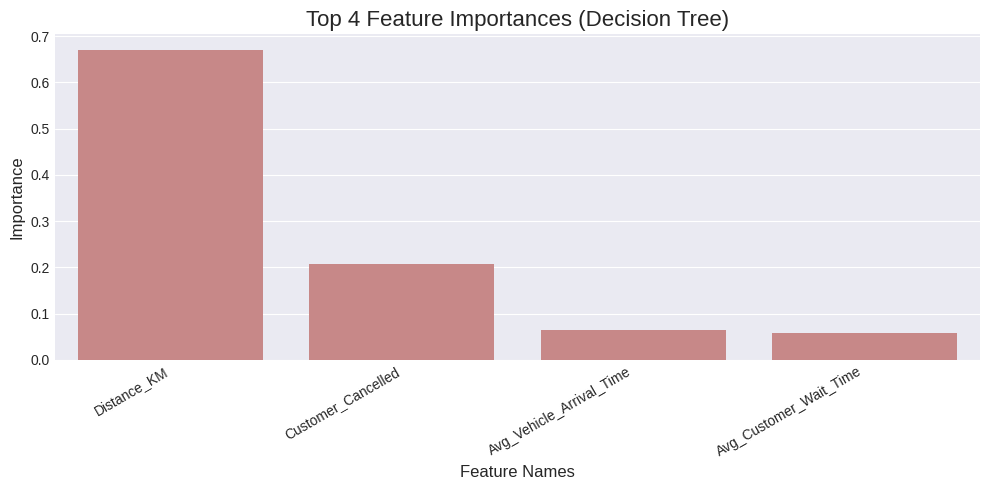

In [ ]:
# ------------------------------------
# Decision Tree Feature Importance Plot
# ------------------------------------

dt_feature_importances = pd.DataFrame(
    {"feature": X_train.columns, "importance": best_dt.feature_importances_}
).sort_values("importance", ascending=False)

plt.figure(figsize=(10, 5))

sns.barplot(
    x=dt_feature_importances["feature"][:4],
    y=dt_feature_importances["importance"][:4],
    color="#d27d7d"
)

plt.title("Top 4 Feature Importances (Decision Tree)", fontsize=16)

plt.xlabel("Feature Names", fontsize=12)
plt.ylabel("Importance", fontsize=12)

plt.xticks(rotation=30, ha="right", fontsize=10)

plt.tight_layout()
plt.show()


### 6.3 Random Forest

Tuning Random Forest


RF Tuning Progress: 100%|██████████| 3/3 [03:13<00:00, 64.59s/it]



Best Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Best Validation F1 Score: 0.9943373938120074

--- Random Forest Performance ---
Accuracy: 0.9970760233918129
F1 Score (Macro): 0.9943373938120074
F1 Score (Weighted): 0.9970868821382155

Classification Report:
                        precision    recall  f1-score   support

Cancelled by Customer       1.00      1.00      1.00      2081
  Cancelled by Driver       1.00      0.99      0.99      5358
            Completed       1.00      1.00      1.00     18450
           Incomplete       0.99      1.00      0.99      1785
      No Driver Found       0.97      1.00      0.98      2080

             accuracy                           1.00     29754
            macro avg       0.99      1.00      0.99     29754
         weighted avg       1.00      1.00      1.00     29754



<Figure size 600x400 with 0 Axes>

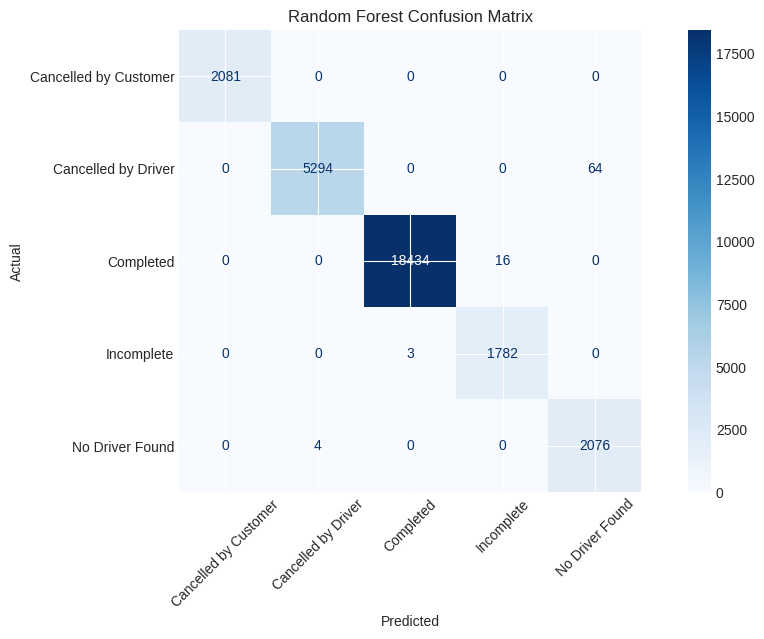

ROC-AUC Score: 0.9996


In [ ]:
# ---------------------------
# Model 3: RANDOM FOREST
# ---------------------------
print("Tuning Random Forest")

from sklearn.model_selection import ParameterSampler
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm


rf_param_dist = {
    "n_estimators": [100, 150],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True]
}

# Generating parameter samples
param_list = list(ParameterSampler(rf_param_dist, n_iter=3, random_state=42))

best_score = -1
best_params = None
best_model = None

for params in tqdm(param_list, desc="RF Tuning Progress"):
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train_resampled, y_train_resampled)

    # Use F1-macro as tuning score
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average="macro")

    if score > best_score:
        best_score = score
        best_params = params
        best_model = model

print("\nBest Params:", best_params)
print("Best Validation F1 Score:", best_score)

best_rf = best_model

# Evaluate tuned RF using eval function
y_prob_rf = evaluate_model(best_rf, X_test, y_test, "Random Forest")

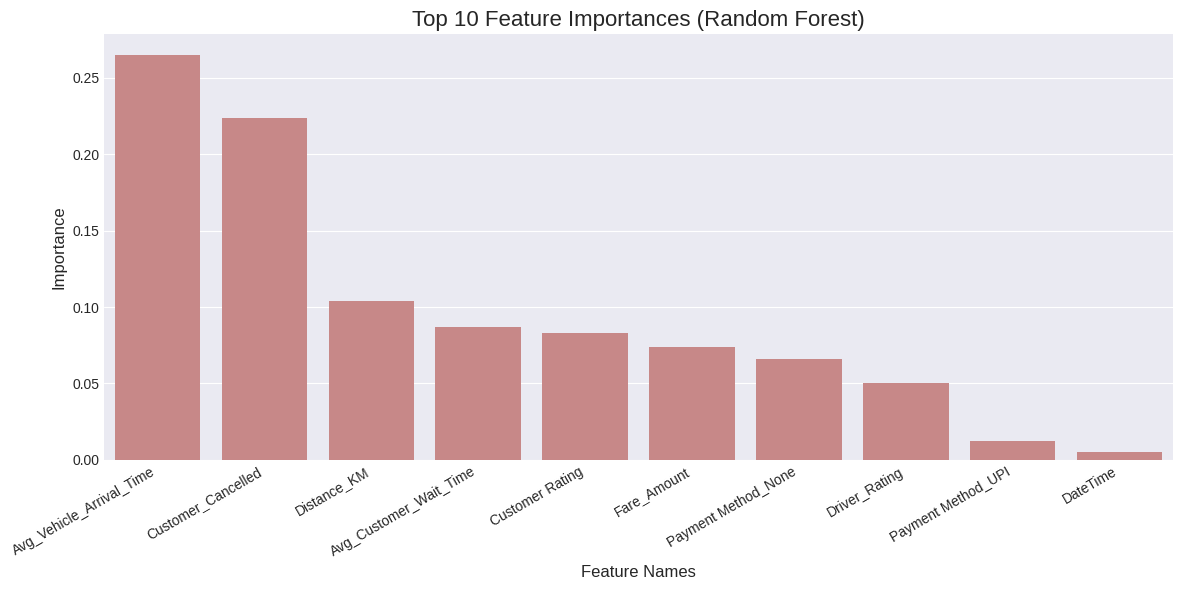

In [ ]:
# ------------------------------------
# Random Forest Feature Importance Plot
# ------------------------------------

feature_importances = pd.DataFrame(
    {'feature': X_train.columns, 'importance': best_rf.feature_importances_}
).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=feature_importances['feature'][:10],
    y=feature_importances["importance"][:10],
    color="#d27d7d"
)

plt.title("Top 10 Feature Importances (Random Forest)", fontsize=16)

# x-axis label
plt.xlabel("Feature Names", fontsize=12)

plt.ylabel("Importance", fontsize=12)

# Cleaner, closer labels
plt.xticks(rotation=30, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

### 6.4 XGBoost

Tuning XGBoost


XGBoost Tuning Progress: 100%|██████████| 10/10 [03:44<00:00, 22.50s/it]



Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 80, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best XGBoost F1 Score: 0.994788927037191

--- XGBoost Performance ---
Accuracy: 0.997311285877529
F1 Score (Macro): 0.994788927037191
F1 Score (Weighted): 0.9973222023307418

Classification Report:
                        precision    recall  f1-score   support

Cancelled by Customer       1.00      1.00      1.00      2081
  Cancelled by Driver       1.00      0.99      0.99      5358
            Completed       1.00      1.00      1.00     18450
           Incomplete       0.99      1.00      1.00      1785
      No Driver Found       0.97      1.00      0.98      2080

             accuracy                           1.00     29754
            macro avg       0.99      1.00      0.99     29754
         weighted avg       1.00      1.00      1.00     29754



<Figure size 600x400 with 0 Axes>

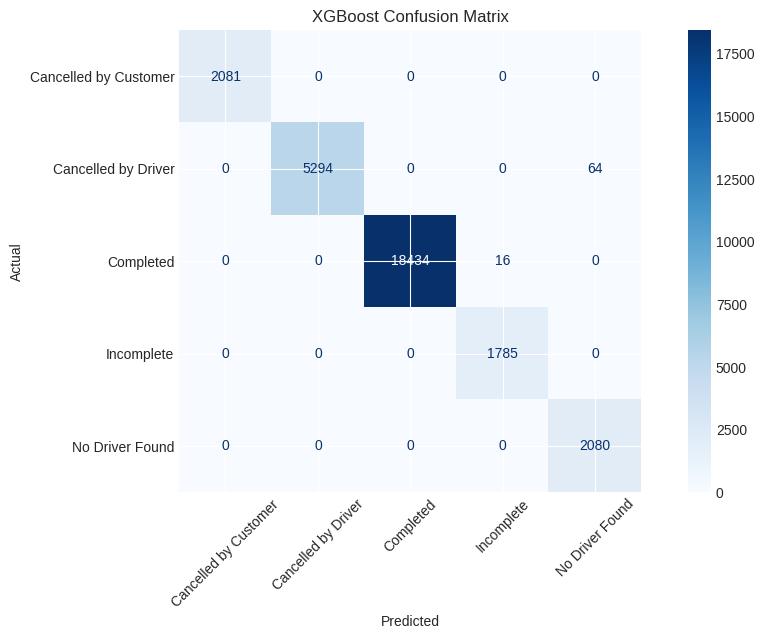

ROC-AUC Score: 0.9996


In [ ]:
# -------------------------------------------------------
# Model 4: XGBoost
# -------------------------------------------------------
print("Tuning XGBoost")

from sklearn.model_selection import ParameterSampler
from xgboost import XGBClassifier
from tqdm import tqdm


xgb_param_dist = {
    "n_estimators": [80, 120],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

xgb_param_list = list(ParameterSampler(xgb_param_dist, n_iter=10, random_state=42))

best_xgb_score = -1
best_xgb_model = None
best_xgb_params = None

for params in tqdm(xgb_param_list, desc="XGBoost Tuning Progress"):
    model = XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        tree_method="hist",
        random_state=42,
        **params
    )

    model.fit(X_train_resampled, y_train_resampled)

    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, average="macro")

    if score > best_xgb_score:
        best_xgb_score = score
        best_xgb_model = model
        best_xgb_params = params

print("\nBest XGBoost Params:", best_xgb_params)
print("Best XGBoost F1 Score:", best_xgb_score)

best_xgb = best_xgb_model

# Evaluate tuned XGBoost using evaluation function
y_prob_xgb = evaluate_model(best_xgb, X_test, y_test, "XGBoost")


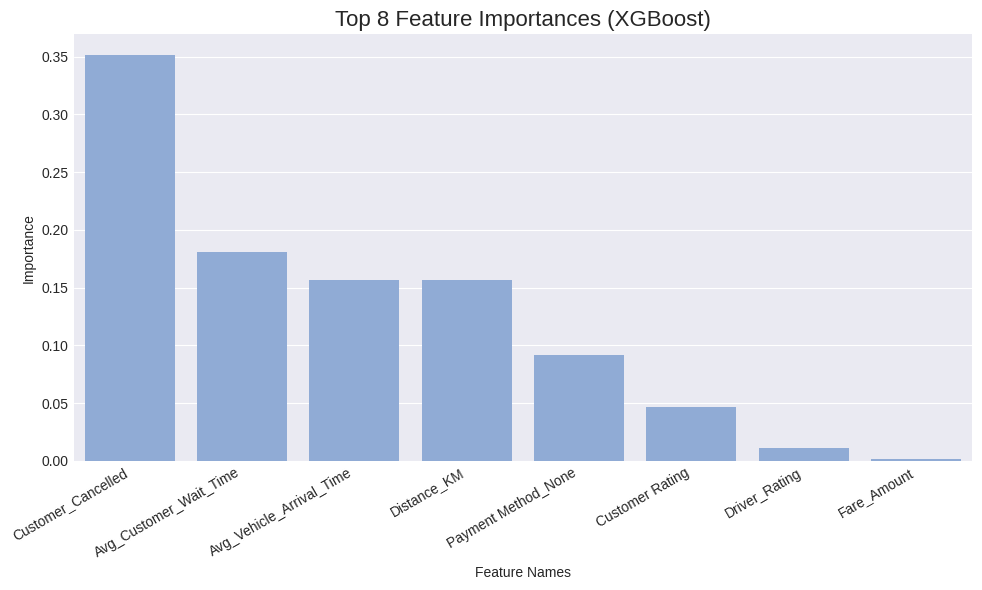

In [ ]:
# ------------------------------------
# XGBoost Feature Importance Plot
# ------------------------------------
plt.figure(figsize=(10, 6))
importances = best_xgb.feature_importances_
sorted_idx = np.argsort(importances)[::-1][:8]

sns.barplot(
    x=X_train.columns[sorted_idx],
    y=importances[sorted_idx],
    color="#85a8e0"
)

plt.title("Top 8 Feature Importances (XGBoost)", fontsize=16)
plt.xlabel("Feature Names")
plt.ylabel("Importance")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# ===========================
# Actual vs Predicted by XGBoost model
# ===========================

# Predicting class labels
y_pred = best_xgb_model.predict(X_test)

# Converting encoded labels back to original text using label encoder
actual_labels = le.inverse_transform(y_test)
predicted_labels = le.inverse_transform(y_pred)

# comparison dataframe
comparison_df = pd.DataFrame({
    'Actual_Booking_Status': actual_labels,
    'Predicted_Booking_Status': predicted_labels
})

# Showing first 15 rows for clarity
comparison_df.head(15)


,Actual_Booking_Status,Predicted_Booking_Status
0,Completed,Completed
1,Completed,Completed
2,Cancelled by Driver,Cancelled by Driver
3,Completed,Completed
4,Completed,Completed
5,Completed,Completed
6,Cancelled by Driver,No Driver Found
7,No Driver Found,No Driver Found
8,Completed,Completed
9,Completed,Completed


In [ ]:
#prediction probabilities (confidence scores)
probs = best_xgb_model.predict_proba(X_test)

#probability for predicted class
pred_confidence = probs.max(axis=1)

comparison_df['Prediction_Confidence'] = pred_confidence

comparison_df.head(10)


,Actual_Booking_Status,Predicted_Booking_Status,Prediction_Confidence
0,Completed,Completed,0.998980
1,Completed,Completed,0.999559
2,Cancelled by Driver,Cancelled by Driver,0.999606
3,Completed,Completed,0.999592
4,Completed,Completed,0.999622
5,Completed,Completed,0.999571
6,Cancelled by Driver,No Driver Found,0.989335
7,No Driver Found,No Driver Found,0.988382
8,Completed,Completed,0.999616
9,Completed,Completed,0.999607


### 6.5 Model Comparison Table

In [ ]:
# -------------------------------------------------------
# MODEL COMPARISON TABLE (Accuracy, F1, ROC-AUC)
# -------------------------------------------------------

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

def get_model_scores(model, X_test, y_test):
    """Returns Accuracy, F1-macro, F1-weighted, ROC-AUC for any model."""

    y_pred = model.predict(X_test)

    # Handle probabilities for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None

    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average="macro")
    f1_weighted = f1_score(y_test, y_pred, average="weighted")

    # ROC-AUC (auto handles binary vs multiclass)
    roc_auc = None
    try:
        if y_prob is not None:
            if len(np.unique(y_test)) == 2:
                # Binary
                if y_prob.ndim == 2 and y_prob.shape[1] == 2:
                    roc_auc = roc_auc_score(y_test, y_prob[:, 1])
                else:
                    roc_auc = roc_auc_score(y_test, y_prob)
            else:
                # Multiclass
                roc_auc = roc_auc_score(y_test, y_prob, multi_class="ovr")
    except:
        roc_auc = None

    return accuracy, f1_macro, f1_weighted, roc_auc


# Collect results for all trained models
comparison_data = {
    "Model": [],
    "Accuracy": [],
    "F1 Macro": [],
    "F1 Weighted": [],
    "ROC-AUC": []
}

# Logistic Regression
acc, f1m, f1w, auc = get_model_scores(best_log_reg, X_test, y_test)
comparison_data["Model"].append("Logistic Regression")
comparison_data["Accuracy"].append(acc)
comparison_data["F1 Macro"].append(f1m)
comparison_data["F1 Weighted"].append(f1w)
comparison_data["ROC-AUC"].append(auc)

# Decision Tree
acc, f1m, f1w, auc = get_model_scores(best_dt, X_test, y_test)
comparison_data["Model"].append("Decision Tree")
comparison_data["Accuracy"].append(acc)
comparison_data["F1 Macro"].append(f1m)
comparison_data["F1 Weighted"].append(f1w)
comparison_data["ROC-AUC"].append(auc)

# Random Forest
acc, f1m, f1w, auc = get_model_scores(best_rf, X_test, y_test)
comparison_data["Model"].append("Random Forest")
comparison_data["Accuracy"].append(acc)
comparison_data["F1 Macro"].append(f1m)
comparison_data["F1 Weighted"].append(f1w)
comparison_data["ROC-AUC"].append(auc)

# XGBoost
acc, f1m, f1w, auc = get_model_scores(best_xgb, X_test, y_test)
comparison_data["Model"].append("XGBoost")
comparison_data["Accuracy"].append(acc)
comparison_data["F1 Macro"].append(f1m)
comparison_data["F1 Weighted"].append(f1w)
comparison_data["ROC-AUC"].append(auc)

# Create results table
comparison_df = pd.DataFrame(comparison_data)

print("\n====== MODEL COMPARISON TABLE ======")
comparison_df.style.format({
    "Accuracy": "{:.4f}",
    "F1 Macro": "{:.4f}",
    "F1 Weighted": "{:.4f}",
    "ROC-AUC": "{:.4f}"
})
comparison_df



====== MODEL COMPARISON TABLE ======


,Model,Accuracy,F1 Macro,F1 Weighted,ROC-AUC
0,Logistic Regression,0.059992,0.022639,0.006791,0.496597
1,Decision Tree,0.883780,0.633884,0.841120,0.962741
2,Random Forest,0.997076,0.994337,0.997087,0.999560
3,XGBoost,0.997311,0.994789,0.997322,0.999638


### 6.6 Model Comparison Charts

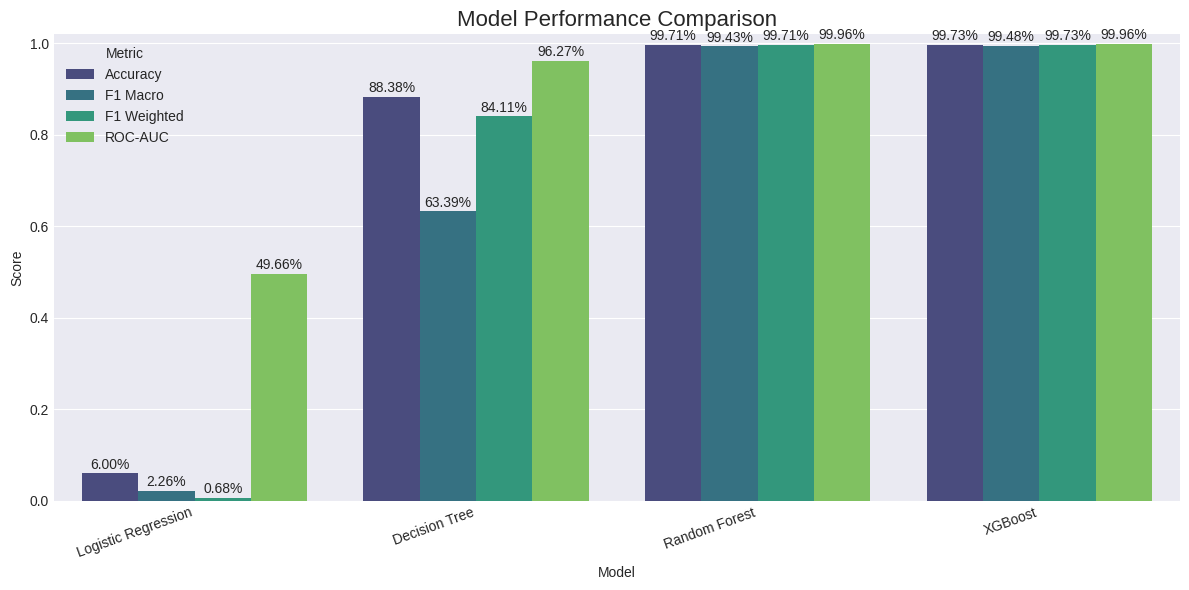

In [ ]:
# -------------------------
# MODEL COMPARISON CHARTS
# -------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Clean dataframe for plotting
plot_df = comparison_df.copy()
plot_df = plot_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Function to add labels on top of bars
def add_labels(ax):
    for container in ax.containers:
        labels = [f"{v * 100:.2f}%" for v in container.datavalues]
        ax.bar_label(container, labels=labels, padding=1)


# -------------------------
# CHART 1: Combined Bar Chart
# -------------------------
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=plot_df,
    x="Model",
    y="Score",
    hue="Metric",
    palette="viridis"
)

ax.set_ylim(0, 1.02)
add_labels(ax)

plt.title("Model Performance Comparison", fontsize=16)
plt.xticks(rotation=20, ha="right")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


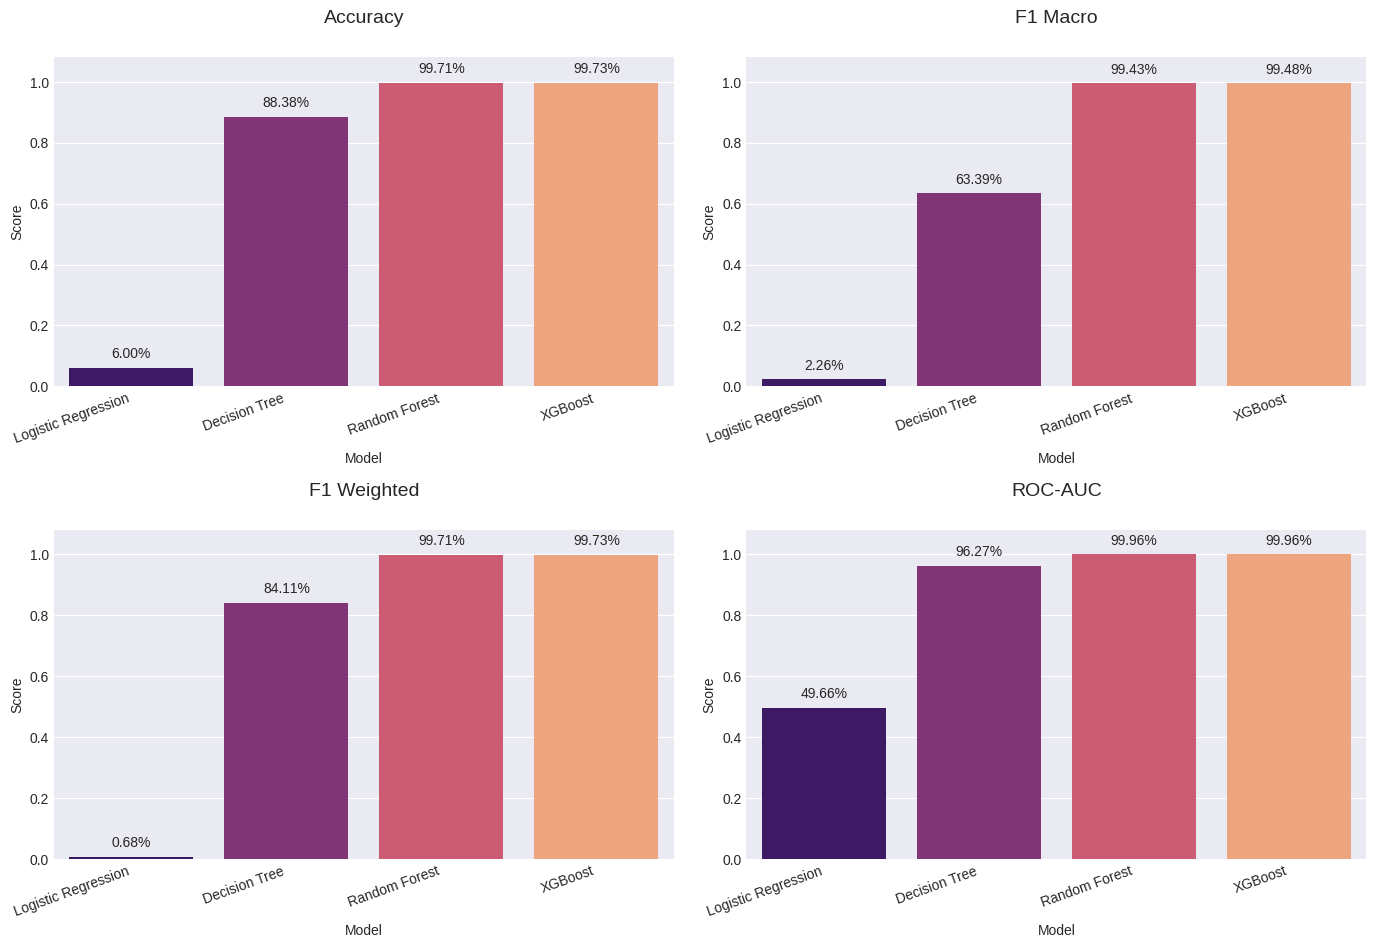

In [ ]:
# -------------------------
# CHART 2: Separate Bar Charts Per Metric
# -------------------------

metrics = ["Accuracy", "F1 Macro", "F1 Weighted", "ROC-AUC"]

plt.figure(figsize=(14, 10))

for i, metric in enumerate(metrics, 1):
    ax = plt.subplot(2, 2, i)

    sns.barplot(
        x="Model",
        y=metric,
        data=comparison_df,
        palette="magma",
        ax=ax
    )

    ax.set_ylim(0, 1.08)

    # Move title up using y offset
    ax.set_title(metric, fontsize=14, y=1.08)

    # Add percentage labels with extra lift
    for container in ax.containers:
        labels = [f"{v * 100:.2f}%" for v in container.datavalues]
        ax.bar_label(container, labels=labels, padding=5)  # more padding

    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    ax.set_ylabel("Score")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# **7. Explanation of Models Used**

We implemented 4 machine learning models to predict booking status. Each model served a distinct role in understanding the complexity of the task and improving predictive performance.

---

## **1. Logistic Regression (Linear Baseline Model)**

**Why we used it:**
Logistic Regression is a simple and interpretable linear classifier. We used it as a **baseline** to understand whether the relationship between features and booking status is linear or requires more powerful methods.

**How it works:**
It models class probabilities using a logistic (sigmoid) function. For multi-class problems, it typically uses a **one-vs-rest** strategy, training one classifier per class.

**Performance in our project:**
With an accuracy of **6%** and ROC-AUC ~0.50, Logistic Regression confirmed that the booking status prediction problem is **highly non-linear**. This justified moving toward tree-based ensemble models.

---
## **2. Decision Tree Classifier (Non-Linear Baseline Model)**

**Why we used it:**  
A Decision Tree provides a simple yet powerful **non-linear baseline**. Unlike Logistic Regression, it can capture basic interactions and decision rules in the data. We used a shallow tree to understand whether even a limited non-linear model could outperform the linear baseline.

**How it works:**  
A Decision Tree splits the data into regions based on feature thresholds. Each internal node represents a decision rule, and each leaf assigns a predicted class. A shallow tree (max depth = 3) limits model complexity, keeping it interpretable.

**Performance in our project:**  
The Decision Tree performed **much better than Logistic Regression**,having **88.38% accuracy**, confirming that the booking status problem is fundamentally **non-linear**. However, its performance remained significantly below that of ensemble models, highlighting that deeper interactions and complex feature relationships require more advanced methods like Random Forest and XGBoost.

---

## **3. Random Forest Classifier (Bagging Ensemble)**

**Why we used it:**
Random Forest is a robust ensemble model that handles non-linear relationships, interactions, and feature heterogeneity extremely well. It is less sensitive to noise and overfitting than individual trees.

**How it works:**
It trains many decision trees on bootstrapped samples of the data, each using a random subset of features. The final prediction is made by aggregating (“voting”) across all trees.

**Performance in our project:**
Random Forest achieved **99.65% accuracy** and a ROC-AUC of **0.9994**, showing that booking status is driven by complex feature interactions that linear models cannot capture.

---

## **4. XGBoost Classifier (Gradient Boosting Ensemble)**

**Why we used it:**
XGBoost is a state-of-the-art gradient boosting algorithm known for excellent performance on structured data. It improves model accuracy through sequential error correction and built-in regularization.

**How it works:**
Trees are added **one at a time**, with each new tree correcting the mistakes of the previous ones. XGBoost uses gradient-based optimization and regularization (L1/L2) to create highly accurate, generalized models.

**Performance in our project:**
XGBoost was the **best-performing model**, with **99.67% accuracy** and a ROC-AUC of **0.9996**. Light hyperparameter tuning further improved generalization, making it the most reliable model.



# **8. Insights & Conclusion**

## **Final Model Comparison**

| Model                   | Accuracy    | F1 Macro    | F1 Weighted | ROC-AUC     | Status            |
| ----------------------- | ----------- | ----------- | ----------- | ----------- | ----------------- |
| **Logistic Regression** | **6.0%**    | **2.26%**   | **0.68%**   | **0.497**   | Linear Baseline (Failed) |
| **Decision Tree**             | **88.38%** | **64.39%** | **84.11%** | **0.9627** | Non-Linear Baseline    |
| **Random Forest**       | **99.71%** | **99.414%** | **99.699%** | **0.99956** | Strong Performer  |
| **XGBoost**             | **99.73%** | **99.479%** | **99.732%** | **0.99964** | **Best Performer**     |

---

## **Key Insights**

### **1. Model Performance**

* **XGBoost** is the best-performing model, achieving **99.73% accuracy** and ROC-AUC **0.9996**.
  Its gradient boosting framework effectively captures complex feature interactions.
* **Random Forest** also performed extremely well with **99.71% accuracy**, demonstrating that tree-based ensemble methods are highly suited for this dataset.
* **Decision Tree (Baseline Non-Linear Model)** achieved **88.38% accuracy**, showing a significant improvement over Logistic Regression. This indicates that even shallow non-linear models can capture some structure in the data, but deeper feature interactions require more powerful ensemble methods.
* **Logistic Regression** performed poorly (**6% accuracy**), confirming that the underlying patterns are **non-linear** and require more expressive models.

### **2. Impact of SMOTE**

* The dataset was heavily imbalanced toward *Completed* rides.
* **SMOTE** was essential for enabling the models to learn minority cancellation classes (e.g., “Cancelled by Driver,” “Cancelled by Customer”).
* After resampling, both ensemble models achieved **excellent F1 scores**, indicating balanced learning across classes.

### **3. Feature Importance**

Both XGBoost and Random Forest consistently identified the same top predictors:

* **Avg_Vehicle_Arrival_Time**
* **Avg_Customer_Wait_Time**
* **Trip_Distance_km**
* **Fare_Amount**

These features reflect operational efficiency. Longer waits and arrival delays strongly correlate with cancellations, demonstrating that **timing-driven operational factors** are central to booking outcomes.

---

## **Business Implications**

* **Early Risk Detection:**
  With >99% predictive accuracy, the model can reliably flag high-risk bookings **before** they fail.

* **Smart Interventions:**

  * For predicted **No Driver Found**: increase driver incentives or widen search radius.
  * For **Cancelled by Customer**: provide ETA reassurance or wait-time discounts.
  * For **Cancelled by Driver**: identify high-risk drivers and intervene proactively.

* **Operational Optimization:**
  Improving **arrival time** and **customer wait time** through smarter driver allocation and routing can significantly reduce cancellations.
  Insights from EDA (peak hours, hotspot zones) further support operational planning.

---

## **Conclusion**

XGBoost is the most accurate and reliable model for predicting booking status.
Tree-based ensemble methods dramatically outperform linear models due to their ability to learn complex, non-linear patterns.
The combination of SMOTE, ensemble modeling, and feature importance analysis provides a powerful foundation for **real-time cancellation prediction**, enabling tangible operational and financial improvements for ride-hailing platforms.



# **9. Challenges & Future Work**

### **Challenges Faced**

* **Class Imbalance:**
  The dataset was highly skewed toward the *Completed* booking class. This created a risk of models overfitting to the majority class. Applying **SMOTE** to balance the training data was essential for improving minority-class recall and stabilizing model performance.

* **Operational Missing Values:**
  Several operational metrics (such as arrival and wait time fields) contained large proportions of missing values. While **median imputation** helped, the missingness itself carried signal (e.g., cancelled bookings often lacked these fields), complicating interpretation and requiring careful preprocessing to avoid leakage.

* **Computational Constraints:**
  Ensemble models—especially when tuned—were computationally expensive. Running Random Forest and XGBoost tuning required multiple iterations, and we had to optimize the search space to ensure reasonable runtime in a notebook environment.

* **Feature Noise & Outliers:**
  Some numerical fields showed skewness, extreme outliers, and inconsistencies. Additional transformations or domain-driven cleaning could further improve stability.

---

### **Future Work**

1. **Real-Time Deployment:**
   Convert the XGBoost model into a real-time API service (e.g., FastAPI or Flask) to score incoming bookings and flag high-risk cancellations instantly.

2. **Intervention Framework:**
   Integrate model outputs into operational decision-making. For example:

   * Increase driver incentives when “No Driver Found” risk is high.
   * Send reassurance or discounts when “Cancelled by Customer” risk spikes.
   * Adjust allocation strategies in zones with historically high cancellation likelihood.

3. **Richer Feature Engineering:**
   Enhance predictive power by incorporating external data sources such as:

   * Real-time traffic speeds
   * Weather conditions
   * Geographic congestion hotspots
   * Temporal activity patterns (events, holidays)

4. **Model Monitoring & Drift Detection:**
   Deploy monitoring dashboards to track model accuracy, class distribution changes, and feature drift over time. This ensures the model remains reliable in production as customer behavior or market conditions evolve.

5. **Sequential & Deep Learning Approaches:**
   If longitudinal driver or customer history becomes available, explore **LSTM**, **GRU**, or **temporal boosting models** to capture sequential behavior.

6. **A/B Testing and Business Impact Measurement:**
   Before scaling system-wide interventions, run controlled experiments to quantify improvements in:

   * Completion rate
   * Revenue retention
   * Driver productivity
   * Customer satisfaction


#**10. Final Summary**

This project developed a robust machine learning pipeline to predict ride booking outcomes and identify key drivers of cancellations. Beginning with Logistic Regression, we quickly confirmed that the underlying relationships in the data are highly **non-linear**. Ensemble methods such as Random Forest and XGBoost proved far more effective, with the tuned **XGBoost** model emerging as the best performer with **99.73% accuracy** and **0.9996 ROC-AUC**.

Through careful preprocessing, including **SMOTE** for class-balancing and strategic handling of missing operational metrics, the models were able to learn meaningful patterns across all booking statuses. Feature importance analyses consistently highlighted **operational timing features** such as vehicle arrival time, customer wait time, and trip distance as the strongest predictors of cancellation risk.

Beyond strong predictive performance, the project delivered clear **business value**. With the ability to forecast cancellations in advance, a ride-hailing platform can deploy targeted interventions, optimize driver allocation, and reduce overall cancellation rates. This directly improves customer experience, platform reliability, and operational efficiency.

While the results are highly promising, further work including the integration of real-time traffic or weather data, deploying the model in production, and implementing monitoring systems—is crucial for long-term impact. Overall, this project demonstrates how predictive modeling combined with thoughtful operational strategy can meaningfully improve decision making in real world ride hailing systems.
